In [1]:
import numpy as np
import random
import numpy.linalg as lia
import pandas as pd
import h5py
import random
import math
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn import datasets
from sklearn.cluster import KMeans

#to plot images
import matplotlib.image as mpimg 
#to read images

import cv2 
#open CV library for Python
import numpy as np
import torch
import torchvision
from torchvision.ops import nms
import torchvision.transforms as transforms
from statistics import stdev

In [2]:
!pip install opencv-python==4.4.0.44
!pip install opencv-contrib-python==4.4.0.44
!pip list

Package                Version
---------------------- -------------------
-pencv-python          4.4.0.46
absl-py                0.11.0
argon2-cffi            20.1.0
astunparse             1.6.3
async-generator        1.10
attrs                  20.3.0
backcall               0.2.0
bleach                 3.2.1
cachetools             4.1.1
certifi                2020.12.5
cffi                   1.14.4
chardet                3.0.4
cloudpickle            1.6.0
colorama               0.4.4
cycler                 0.10.0
cytoolz                0.11.0
dask                   2020.12.0
decorator              4.4.2
defusedxml             0.6.0
entrypoints            0.3
gast                   0.3.3
google-auth            1.23.0
google-auth-oauthlib   0.4.2
google-pasta           0.2.0
grpcio                 1.34.0
h5py                   2.10.0
idna                   2.10
imagecodecs            2020.5.30
imageio                2.9.0
importlib-metadata     2.0.0
imutils                0.5.3
ipykern

In [3]:
def loadBGRImage(path):
    image = BGR(cv.imread(path))
    return image

def loadGreyImage(path):
    image = cv.imread(path, cv.IMREAD_GRAYSCALE)
    return image

def BGR(image):
    image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
    return image

def displayGreyImage(image, imageName):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap = 'gray')
    plt.title(imageName)
    plt.show()

def displayGreyWindows(image, imageName):
    plt.figure(figsize=(3, 3))
    plt.imshow(image, cmap = 'gray')
    plt.title(imageName)
    plt.show()
    
def displayBGRImage(image, imageName, size):
    plt.figure(figsize=(size, size))
    plt.imshow(image)
    plt.title(imageName)
    plt.show()
    
def displayBGRImageLarge(image, imageName):
    plt.figure(figsize=(18, 18))
    plt.imshow(image)
    plt.title(imageName)
    plt.show()
    
def imageSideBySide(images, imageNames,size):
    row = np.ceil(len(images)/20)
    fig=plt.figure(figsize=(size, size/2))
    for i, image in enumerate(images):
        fig.add_subplot(row, 20, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(imageNames[i])
    plt.show()

In [4]:
start = 25, 26
size = 14, 12

f = h5py.File('MNIST_synthetic.h5', 'r')

list(f.keys())

['test_dataset', 'train_dataset', 'train_labels']

In [5]:
train_dataset = np.squeeze(np.array(f["train_dataset"])).copy()
train_labels = np.squeeze(np.array(f["train_labels"])).copy()
test_dataset = np.squeeze(np.array(f["test_dataset"])).copy()

singulars_digits = []
singulars_labels = []

doubles_digits = []
doubles_labels = []

triples_digits = []
triples_labels = []

quadruples_digits = []
quadruples_labels = []

quintuples_digits = []
quintuples_labels = []


for i, labels in enumerate(train_labels):
    if labels[1] == 10:
        singulars_digits.append(train_dataset[i])
        singulars_labels.append(train_labels[i])
        
    if labels[1] != 10 and labels[2] == 10:
        doubles_digits.append(train_dataset[i])
        doubles_labels.append(train_labels[i])
        
    if labels[2] != 10 and labels[3] == 10:
        triples_digits.append(train_dataset[i])
        triples_labels.append(train_labels[i])
        
    if labels[3] != 10 and labels[4] == 10:
        quadruples_digits.append(train_dataset[i])
        quadruples_labels.append(train_labels[i])
        
    if labels[4] != 10:
        quintuples_digits.append(train_dataset[i])
        quintuples_labels.append(train_labels[i])

In [6]:
singulars_digits = np.array(singulars_digits)     
doubles_digits = np.array(doubles_digits)  
triples_digits = np.array(triples_digits)    
quadruples_digits = np.array(quadruples_digits)    
quintuples_digits = np.array(quintuples_digits)    

singulars_labels = np.array(singulars_labels).T[0]
doubles_labels = np.array(doubles_labels).T[0:2].T
triples_label = np.array(triples_labels).T[0:3].T
quadruples_label = np.array(quadruples_labels).T[0:4].T
quintuples_label = np.array(quintuples_labels).T[0:5].T

In [7]:
final_singulars_dataset = []
final_singulars_labels = list(singulars_labels)
for i, digit in enumerate(singulars_digits):
    final_singulars_dataset.append(digit[26:38,26:38])
    
final_doubles_dataset = []
final_doubles_labels = []
for i, digit in enumerate(doubles_digits):
    final_doubles_dataset.append(digit[26:38,20:32])
    final_doubles_dataset.append(digit[26:38,32:44])
    final_doubles_labels.append(doubles_labels[i][0])
    final_doubles_labels.append(doubles_labels[i][1])

final_triples_dataset = []
final_triples_labels = []
for i, digit in enumerate(triples_digits):
    final_triples_dataset.append(digit[26:38,14:26])
    final_triples_dataset.append(digit[26:38,26:38])
    final_triples_dataset.append(digit[26:38,38:50])
    final_triples_labels.append(triples_labels[i][0])
    final_triples_labels.append(triples_labels[i][1])
    final_triples_labels.append(triples_labels[i][2])
    
final_quadruples_dataset = []
final_quadruples_labels = []
for i, digit in enumerate(quadruples_digits):
    final_quadruples_dataset.append(digit[26:38,8:20])
    final_quadruples_dataset.append(digit[26:38,20:32])
    final_quadruples_dataset.append(digit[26:38,32:44])
    final_quadruples_dataset.append(digit[26:38,44:56])
    final_quadruples_labels.append(quadruples_labels[i][0])
    final_quadruples_labels.append(quadruples_labels[i][1])    
    final_quadruples_labels.append(quadruples_labels[i][2])
    final_quadruples_labels.append(quadruples_labels[i][3]) 
    
final_quintuples_dataset = []
final_quintuples_labels = []
for i, digit in enumerate(quintuples_digits):
    final_quintuples_dataset.append(digit[26:38,2:14])
    final_quintuples_dataset.append(digit[26:38,14:26])
    final_quintuples_dataset.append(digit[26:38,26:38])
    final_quintuples_dataset.append(digit[26:38,38:50])
    final_quintuples_dataset.append(digit[26:38,50:62])
    final_quintuples_labels.append(quintuples_labels[i][0])
    final_quintuples_labels.append(quintuples_labels[i][1])
    final_quintuples_labels.append(quintuples_labels[i][2])
    final_quintuples_labels.append(quintuples_labels[i][3])
    final_quintuples_labels.append(quintuples_labels[i][4])

In [8]:
merged_dataset = final_singulars_dataset + final_doubles_dataset + final_triples_dataset + final_quadruples_dataset + final_quintuples_dataset
merged_labels = final_singulars_labels + final_doubles_labels + final_triples_labels + final_quadruples_labels + final_quintuples_labels

In [9]:
count = 0

for digit in range(10):
    digit_count = list(merged_labels).count(digit)
    print(f"number of {digit}'s in train dataset: {digit_count}")
    count += digit_count

print("total number of digits in train dataset:", count)

number of 0's in train dataset: 16379
number of 1's in train dataset: 18819
number of 2's in train dataset: 17095
number of 3's in train dataset: 17220
number of 4's in train dataset: 16393
number of 5's in train dataset: 15275
number of 6's in train dataset: 16401
number of 7's in train dataset: 17611
number of 8's in train dataset: 16175
number of 9's in train dataset: 16518
total number of digits in train dataset: 167886


In [10]:
digitsTrainingSetSize = int(np.ceil(0.8 * len(merged_dataset)))
digitsValidationSetSize = int(len(merged_labels) - digitsTrainingSetSize)

xValidationSet = []
yValidationSet = []

for index, digit in enumerate(merged_dataset[0:digitsValidationSetSize]):
    xValidationSet.append(digit)
    yValidationSet.append(merged_labels[index])

xTrainingSet = []
yTrainingSet = []

start = len(xValidationSet)

for i, digit in enumerate(merged_dataset[start:]):
    xTrainingSet.append(digit)
    yTrainingSet.append(merged_labels[i+start])

## Finding all digits in an image

In [11]:
def find_digits(train_dataset, size):
    thresh_train_dataset = train_dataset.copy()
    thresh_train_dataset[thresh_train_dataset>30] = 255
    thresh_train_dataset[thresh_train_dataset!=255] = 0
    #displayGreyImage(thresh_train_dataset,"")
    i,j = np.where(thresh_train_dataset[:,:]!=0)
    #print(i)
    bottom_bound = np.min(i)
    top_bound = np.max(i)
    left_bound = np.min(j)
    right_bound = np.max(j)
    #print(top_bound, bottom_bound)

    h = top_bound-bottom_bound
    w = right_bound-left_bound

    bounded_train_dataset = train_dataset[bottom_bound-1:top_bound+2,left_bound-1:right_bound+2]
    thresh = bounded_train_dataset.copy()
    thresh[thresh>30] = 255
    thresh[thresh!=255] = 0
    #displayGreyImage(bounded_train_dataset,"")

    #ret, thresh = cv2.threshold(bounded_train_dataset, 30, 255, 0)
    #seg = np.where(np.any(thresh, axis=0)==0)
    seg = np.where(np.any(thresh, axis=0)==0)

    #print(seg)
    seg_list = np.asarray(seg)
    seg_list = seg_list[0]
    #print(seg_list)

    from statistics import stdev
    sd =0 # remove this and its return when done
    if len(seg_list)>2:
        # create a list of the gaps between the consecutive values
        gaps = [y - x for x, y in zip(seg_list[:-1], seg_list[1:])]
        # have python calculate the standard deviation for the gaps
        sd = stdev(gaps)
        #print(sd)

        # create a list of lists, put the first value of the source data in the first
        lists = [[seg_list[0]]]
        for x in seg_list[1:]:
            # if the gap from the current item to the previous is more than 1 SD
            # Note: the previous item is the last item in the last list
            # Note: the '> 1' is the part you'd modify to make it stricter or more relaxed
            if sd<1.5 and sd>0:
                if (x - lists[-1][-1]) / (sd+1e-18) > 1.5:
                    # then start a new list
                    lists.append([])
              # add the current item to the last list in the list
                lists[-1].append(x)
            elif sd==0:
                if (x - lists[-1][-1])>1:
                    lists.append([])
                lists[-1].append(x)
            else:
                if (x - lists[-1][-1]) / (sd+1e-18) > 0.8:
                  # then start a new list
                  lists.append([])
                # add the current item to the last list in the list
                lists[-1].append(x)

        splits = np.asarray([np.ceil(np.mean(lists[i])) for i in range(len(lists))]).astype(int)

    else:
        splits = np.asarray(seg_list)
      #print(splits)

    n_digits = len(splits)-1
    #digits = np.zeros(n_digits, )
    digits = []
    for i in range(n_digits):
        temp = bounded_train_dataset[:,splits[i]:splits[i+1]]
        # if temp is less than recommeded size first pad on left and then on both sides
        temp_padded = temp.copy()
        if (temp.shape[0] != size) or  (temp.shape[1] != size):
            diff_y = size-temp.shape[0]
            split_diff_y = diff_y//2
            remainder_diff_y = diff_y%2
            diff_x = size-temp.shape[1]
            split_diff_x = diff_x//2
            remainder_diff_x = diff_x%2
            #print(diff_y)
            #print(split_diff_y)
            temp_padded = np.pad(temp, ((split_diff_y+remainder_diff_y,split_diff_y),(split_diff_x+remainder_diff_x,split_diff_x)))

        digits.append(temp_padded)
      #displayGreyImage(train_dataset[bottom_bound-1:top_bound+2,left_bound-1:right_bound+2],train_labels[367])
    return digits, n_digits

In [12]:
def create_boxes_hacks(image, dig_centers):
    
    n_dig = len(dig_centers)
    digits = []
    if n_dig == 1:
        digits.append(image[26:38,26:38])
    elif n_dig == 2:
        digits.append(image[26:38,20:32])
        digits.append(image[26:38,32:44])
    elif n_dig == 3:
        digits.append(image[26:38,14:26])
        digits.append(image[26:38,26:38])
        digits.append(image[26:38,38:50])
    elif n_dig == 4:
        digits.append(image[26:38,8:20])
        digits.append(image[26:38,20:32])
        digits.append(image[26:38,32:44])
        digits.append(image[26:38,44:56])
    elif n_dig == 5:
        digits.append(image[26:38,2:14])
        digits.append(image[26:38,14:26])
        digits.append(image[26:38,26:38])
        digits.append(image[26:38,38:50])
        digits.append(image[26:38,50:62])

    return digits

In [13]:
import random as rng
rng.seed(12345)
def thresh_callback(src, val=30):
    threshold = val

    src_gray = cv2.blur(src, (1,1))

    #src_gray = bounding_box(src_gray,30)

    canny_output = cv2.Canny(src_gray, threshold, threshold * 2)
    
    
    contours, _ = cv2.findContours(canny_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    
    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)
    for i, c in enumerate(contours):
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        boundRect[i] = cv2.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv2.minEnclosingCircle(contours_poly[i])
    

    arr_centers = np.asarray(centers)
    arr_radius  = np.asarray(radius)

    centers_inds = np.argsort(arr_centers[:,0])
    sorted_centers = arr_centers[centers_inds[::]]
    sorted_radius = arr_radius[centers_inds[::]]
    """
    print("before:", arr_centers)
    print(arr_radius)
    print("after:", sorted_centers)
    print(sorted_radius)
    """

    new_centers = [sorted_centers[i] for i in range(len(sorted_centers)) if sorted_radius[i]>1 and sorted_radius[i]<7]
    new_radius  = [sorted_radius[i] for i in range(len(sorted_radius)) if sorted_radius[i]>1 and sorted_radius[i]<7] 
    
    """
    for i, x in enumerate(new_centers):
      print("new centers", x,"new radius", new_radius[i])
    """

    """
    print(boundRect)
    """

    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

    """
    for i in range(len(centers)):
      color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
      cv2.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)
    """
    
    for i in range(len(new_centers)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv2.circle(drawing, (int(new_centers[i][0]), int(new_centers[i][1])), int(new_radius[i]), color, 2)
    
    """
    displayGreyImage(drawing, "contours")
    """
    
    boxes = []
    scores = []
    boxes_tensor = torch.empty(size=(len(new_centers), 4))
    scores_tensor = torch.empty(len(new_centers))
    for i, x in enumerate(new_centers):
        #print(int(x[0]-new_radius[i]))
        bottom = np.floor(x[1]-new_radius[i]).astype(int)
        top = np.ceil(x[1]+new_radius[i]).astype(int)
        left = np.floor(x[0]-new_radius[i]).astype(int)
        right = np.ceil(x[0]+new_radius[i]).astype(int)
        
        """
        print(f'bottom: {bottom} top: {top} left: {left} right: {right}')
        """

        box = src_gray[bottom:top, left:right]
        score = box.sum()
        scores.append(score)

        #displayGreyImage(box, i)
        boxes.append(box)
        """
        displayGreyImage(boxes[i], i)
        """
        #box_tensor = torch.tensor([bottom, left, top, right])
        #boxes_tensor = torch.cat([box_tensor],0)
        boxes_tensor[i] = torch.tensor([left, bottom, right, top])
        scores_tensor[i] = torch.tensor([score], dtype=torch.float32)

    
    """
    print(f"boxes:{boxes_tensor} scores: {scores_tensor}")
    """

    
    max_boxes_ind = nms(boxes = boxes_tensor, scores = scores_tensor, iou_threshold=0.1)
    
    """
    print(max_boxes_ind)
    """
    
    #cv2_imshow(drawing)
    
    j_list = np.asarray(new_centers)
    """
    print(j_list[:,0])
    """
    j_list = np.asarray(j_list[:,0])
    j_list = np.sort(j_list)
    """
    print("jlist", j_list)
    #print(j_list[1]-j_list[0])
    """

    # create a list of the diffirence in centers between consecutive values
    gaps = [y - x for x, y in zip(j_list[:-1], j_list[1:])]
    """
    print(gaps)
    """
    
    # have python calculate the standard deviation for the gaps
    #sd = stdev(gaps)
    """
    print(sd)
    """
    # create a list of lists, put the first value of the source data in the first
    lists = [[j_list[0]]]
    """
    print(lists)
    """
    radius_lists = [[new_radius[0]]]
    mean_radius = np.median(new_radius)
    #print(mean_radius)
    for i, x in enumerate(j_list[1:]):
        """
        print(x- lists[-1][-1])
        print(new_radius[i])
        
        print(new_radius[i+1])
        print(x-new_radius[i] - (lists[-1][-1]+new_radius[i-1]))
        """
        # if the gap from the current item to the previous is more than 1 SD
        # Note: the previous item is the last item in the last list
        # Note: the '> 1' is the part you'd modify to make it stricter or more relaxed
        if np.abs(x - (lists[-1][-1])) > 6: #radius[i] (new_radius[i]+new_radius[i+1])*2/3
            lists.append([])
            radius_lists.append([])
        lists[-1].append(x)
        radius_lists[-1].append(new_radius[i])
    """
    print(lists)
    print(radius_lists)
    """
    digit_centers = np.asarray([np.mean(lists[i]) for i in range(len(lists))]).astype(int)
    digit_radius = np.asarray([np.max(radius_lists[i]) for i in range(len(radius_lists))]).astype(int)

    final_boxes = create_boxes_hacks(src, digit_centers)

    """
    for i in range(len(final_boxes)):
        displayGreyImage(final_boxes[i],"")
    """
    
    n_digits = len(final_boxes)

    """
    print(digit_centers, digit_radius)
    print(digit_centers)
    print(len(digit_centers))
    """
    return final_boxes, n_digits

In [14]:
wrong = 0 
wrong_arr = []
wrong_arr_index = []
correct = []

for i, sample in enumerate(train_dataset):
    snips, n_dig = thresh_callback(sample)
    real_num_digits = 5 - list(train_labels[i]).count(10)

    if(n_dig != real_num_digits):
        print("incorrect at index:", i)
        wrong += 1
        wrong_arr.append(snips)
        wrong_arr_index.append(i)  

print("total percentage incorrect:", wrong / len(train_dataset) * 100, "%")

incorrect at index: 2903
incorrect at index: 4555
incorrect at index: 7230
incorrect at index: 7472
incorrect at index: 12016
incorrect at index: 12127
incorrect at index: 13485
incorrect at index: 16017
incorrect at index: 18127
incorrect at index: 19418
incorrect at index: 19580
incorrect at index: 19752
incorrect at index: 20317
incorrect at index: 20829
incorrect at index: 24262
incorrect at index: 25284
incorrect at index: 28261
incorrect at index: 32014
incorrect at index: 32944
incorrect at index: 32954
incorrect at index: 33012
incorrect at index: 38206
incorrect at index: 48432
incorrect at index: 50390
incorrect at index: 51039
total percentage incorrect: 0.044642857142857144 %


In [15]:
num_test_digits = 0

for i, sample in enumerate(test_dataset):
    images, n_digits = thresh_callback(sample)
   
    num_test_digits += n_digits

divs = []

for div in range(1, 100):
    if(num_test_digits % (div) == 0):
        divs.append(div)

batch_size = divs[-1]
print(batch_size)

17


# CNN

In [16]:
def create_batches(input_array, label_array, batch_size):
    batched = []
    label_batched = []
    
    for i in range(np.floor(len(input_array)/batch_size).astype(int)):
        batched.append(np.expand_dims((np.array(input_array[i*batch_size:i*batch_size+batch_size])).astype(np.single),axis=1))
        label_batched.append(label_array[i*batch_size:i*batch_size+batch_size])
        
    return np.array(batched), label_batched

In [17]:
class Net(nn.Module):
    def __init__(self, h_layers):
        self.num_layers = len(h_layers)
        self.h_layers = h_layers      
        self.convs = []
        
        super(Net, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(3 * 3 * 256, 1000)
        self.fc2 = nn.Linear(1000, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

# Train CNN for hyper-parameter testing

In [18]:
training_dataset_batch, training_labels_batch = create_batches(xTrainingSet, yTrainingSet, batch_size)
validation_dataset_batch, validation_labels_batch = create_batches(xValidationSet, yValidationSet, batch_size)

# model hyper-parameters
h_layers = ([batch_size, 64])
max_iters = 30
learning_rate = 0.001
momentum = 0.9


dont_run = False
# train neural network

training_accuracies = []
validation_accuracies = []

if not dont_run:
    net = Net(h_layers)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)

    for epoch in range(max_iters):
        running_loss = 0.0

        for i, data in enumerate(training_dataset_batch):
            inputs = torch.from_numpy(data)
            labels = training_labels_batch[i] 
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, torch.from_numpy(np.array(labels).astype(np.longlong)))
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if i % 20 == 19:
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 20))
                running_loss = 0.0

    # test validation set on model
        correct = 0
        total = 0


        with torch.no_grad():
            for i, data in enumerate(training_dataset_batch):
                images = torch.from_numpy(data)
                labels = training_labels_batch[i]
                labels = torch.from_numpy(np.array(labels).astype(np.longlong))
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                if (int(predicted[0]) != int(labels[0])):
                    None
                    
            training_accuracies.append(100 * correct / total)
        
        with torch.no_grad():
            for i, data in enumerate(validation_dataset_batch):
                images = torch.from_numpy(data)
                labels = validation_labels_batch[i]
                labels = torch.from_numpy(np.array(labels).astype(np.longlong))
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                if (int(predicted[0]) != int(labels[0])):
                    None
                    
            validation_accuracies.append(100 * correct / total)

    #print(f"validation set accuracy ({total} samples): {(100 * correct / total)}")

[1,    20] loss: 2.525
[1,    40] loss: 2.089
[1,    60] loss: 1.781
[1,    80] loss: 1.375
[1,   100] loss: 1.129
[1,   120] loss: 0.906
[1,   140] loss: 0.816
[1,   160] loss: 0.604
[1,   180] loss: 0.521
[1,   200] loss: 0.385
[1,   220] loss: 0.415
[1,   240] loss: 0.401
[1,   260] loss: 0.340
[1,   280] loss: 0.372
[1,   300] loss: 0.453
[1,   320] loss: 0.342
[1,   340] loss: 0.372
[1,   360] loss: 0.319
[1,   380] loss: 0.311
[1,   400] loss: 0.283
[1,   420] loss: 0.277
[1,   440] loss: 0.264
[1,   460] loss: 0.327
[1,   480] loss: 0.281
[1,   500] loss: 0.313
[1,   520] loss: 0.188
[1,   540] loss: 0.212
[1,   560] loss: 0.267
[1,   580] loss: 0.249
[1,   600] loss: 0.267
[1,   620] loss: 0.370
[1,   640] loss: 0.247
[1,   660] loss: 0.232
[1,   680] loss: 0.226
[1,   700] loss: 0.319
[1,   720] loss: 0.168
[1,   740] loss: 0.179
[1,   760] loss: 0.253
[1,   780] loss: 0.168
[1,   800] loss: 0.198
[1,   820] loss: 0.198
[1,   840] loss: 0.123
[1,   860] loss: 0.179
[1,   880] 

[1,  7160] loss: 0.088
[1,  7180] loss: 0.064
[1,  7200] loss: 0.031
[1,  7220] loss: 0.074
[1,  7240] loss: 0.073
[1,  7260] loss: 0.054
[1,  7280] loss: 0.050
[1,  7300] loss: 0.056
[1,  7320] loss: 0.028
[1,  7340] loss: 0.058
[1,  7360] loss: 0.044
[1,  7380] loss: 0.050
[1,  7400] loss: 0.078
[1,  7420] loss: 0.073
[1,  7440] loss: 0.047
[1,  7460] loss: 0.060
[1,  7480] loss: 0.091
[1,  7500] loss: 0.075
[1,  7520] loss: 0.083
[1,  7540] loss: 0.060
[1,  7560] loss: 0.070
[1,  7580] loss: 0.065
[1,  7600] loss: 0.057
[1,  7620] loss: 0.041
[1,  7640] loss: 0.077
[1,  7660] loss: 0.069
[1,  7680] loss: 0.052
[1,  7700] loss: 0.057
[1,  7720] loss: 0.045
[1,  7740] loss: 0.050
[1,  7760] loss: 0.029
[1,  7780] loss: 0.070
[1,  7800] loss: 0.081
[1,  7820] loss: 0.050
[1,  7840] loss: 0.050
[1,  7860] loss: 0.036
[1,  7880] loss: 0.094
[1,  7900] loss: 0.057
[2,    20] loss: 0.081
[2,    40] loss: 0.024
[2,    60] loss: 0.086
[2,    80] loss: 0.043
[2,   100] loss: 0.072
[2,   120] 

[2,  6400] loss: 0.045
[2,  6420] loss: 0.043
[2,  6440] loss: 0.061
[2,  6460] loss: 0.025
[2,  6480] loss: 0.037
[2,  6500] loss: 0.038
[2,  6520] loss: 0.012
[2,  6540] loss: 0.033
[2,  6560] loss: 0.110
[2,  6580] loss: 0.035
[2,  6600] loss: 0.012
[2,  6620] loss: 0.029
[2,  6640] loss: 0.051
[2,  6660] loss: 0.023
[2,  6680] loss: 0.041
[2,  6700] loss: 0.041
[2,  6720] loss: 0.055
[2,  6740] loss: 0.052
[2,  6760] loss: 0.033
[2,  6780] loss: 0.015
[2,  6800] loss: 0.020
[2,  6820] loss: 0.037
[2,  6840] loss: 0.059
[2,  6860] loss: 0.062
[2,  6880] loss: 0.062
[2,  6900] loss: 0.055
[2,  6920] loss: 0.016
[2,  6940] loss: 0.025
[2,  6960] loss: 0.021
[2,  6980] loss: 0.036
[2,  7000] loss: 0.028
[2,  7020] loss: 0.012
[2,  7040] loss: 0.038
[2,  7060] loss: 0.043
[2,  7080] loss: 0.011
[2,  7100] loss: 0.021
[2,  7120] loss: 0.016
[2,  7140] loss: 0.015
[2,  7160] loss: 0.040
[2,  7180] loss: 0.043
[2,  7200] loss: 0.035
[2,  7220] loss: 0.041
[2,  7240] loss: 0.093
[2,  7260] 

[3,  5640] loss: 0.053
[3,  5660] loss: 0.031
[3,  5680] loss: 0.009
[3,  5700] loss: 0.015
[3,  5720] loss: 0.005
[3,  5740] loss: 0.030
[3,  5760] loss: 0.025
[3,  5780] loss: 0.033
[3,  5800] loss: 0.032
[3,  5820] loss: 0.021
[3,  5840] loss: 0.009
[3,  5860] loss: 0.017
[3,  5880] loss: 0.026
[3,  5900] loss: 0.006
[3,  5920] loss: 0.031
[3,  5940] loss: 0.024
[3,  5960] loss: 0.005
[3,  5980] loss: 0.014
[3,  6000] loss: 0.012
[3,  6020] loss: 0.002
[3,  6040] loss: 0.038
[3,  6060] loss: 0.018
[3,  6080] loss: 0.012
[3,  6100] loss: 0.010
[3,  6120] loss: 0.021
[3,  6140] loss: 0.015
[3,  6160] loss: 0.022
[3,  6180] loss: 0.006
[3,  6200] loss: 0.018
[3,  6220] loss: 0.024
[3,  6240] loss: 0.040
[3,  6260] loss: 0.081
[3,  6280] loss: 0.020
[3,  6300] loss: 0.016
[3,  6320] loss: 0.015
[3,  6340] loss: 0.018
[3,  6360] loss: 0.019
[3,  6380] loss: 0.034
[3,  6400] loss: 0.039
[3,  6420] loss: 0.032
[3,  6440] loss: 0.048
[3,  6460] loss: 0.037
[3,  6480] loss: 0.034
[3,  6500] 

[4,  4880] loss: 0.022
[4,  4900] loss: 0.006
[4,  4920] loss: 0.015
[4,  4940] loss: 0.032
[4,  4960] loss: 0.031
[4,  4980] loss: 0.028
[4,  5000] loss: 0.050
[4,  5020] loss: 0.028
[4,  5040] loss: 0.049
[4,  5060] loss: 0.016
[4,  5080] loss: 0.042
[4,  5100] loss: 0.009
[4,  5120] loss: 0.031
[4,  5140] loss: 0.007
[4,  5160] loss: 0.016
[4,  5180] loss: 0.059
[4,  5200] loss: 0.023
[4,  5220] loss: 0.021
[4,  5240] loss: 0.011
[4,  5260] loss: 0.013
[4,  5280] loss: 0.008
[4,  5300] loss: 0.023
[4,  5320] loss: 0.026
[4,  5340] loss: 0.027
[4,  5360] loss: 0.038
[4,  5380] loss: 0.005
[4,  5400] loss: 0.011
[4,  5420] loss: 0.025
[4,  5440] loss: 0.034
[4,  5460] loss: 0.015
[4,  5480] loss: 0.015
[4,  5500] loss: 0.007
[4,  5520] loss: 0.002
[4,  5540] loss: 0.031
[4,  5560] loss: 0.020
[4,  5580] loss: 0.011
[4,  5600] loss: 0.045
[4,  5620] loss: 0.014
[4,  5640] loss: 0.021
[4,  5660] loss: 0.016
[4,  5680] loss: 0.008
[4,  5700] loss: 0.014
[4,  5720] loss: 0.003
[4,  5740] 

[5,  4120] loss: 0.021
[5,  4140] loss: 0.011
[5,  4160] loss: 0.017
[5,  4180] loss: 0.005
[5,  4200] loss: 0.016
[5,  4220] loss: 0.012
[5,  4240] loss: 0.007
[5,  4260] loss: 0.009
[5,  4280] loss: 0.024
[5,  4300] loss: 0.008
[5,  4320] loss: 0.008
[5,  4340] loss: 0.016
[5,  4360] loss: 0.004
[5,  4380] loss: 0.017
[5,  4400] loss: 0.019
[5,  4420] loss: 0.027
[5,  4440] loss: 0.009
[5,  4460] loss: 0.025
[5,  4480] loss: 0.012
[5,  4500] loss: 0.003
[5,  4520] loss: 0.018
[5,  4540] loss: 0.012
[5,  4560] loss: 0.016
[5,  4580] loss: 0.008
[5,  4600] loss: 0.023
[5,  4620] loss: 0.031
[5,  4640] loss: 0.013
[5,  4660] loss: 0.013
[5,  4680] loss: 0.013
[5,  4700] loss: 0.003
[5,  4720] loss: 0.024
[5,  4740] loss: 0.024
[5,  4760] loss: 0.003
[5,  4780] loss: 0.003
[5,  4800] loss: 0.011
[5,  4820] loss: 0.007
[5,  4840] loss: 0.007
[5,  4860] loss: 0.005
[5,  4880] loss: 0.002
[5,  4900] loss: 0.004
[5,  4920] loss: 0.007
[5,  4940] loss: 0.003
[5,  4960] loss: 0.016
[5,  4980] 

[6,  3360] loss: 0.043
[6,  3380] loss: 0.020
[6,  3400] loss: 0.069
[6,  3420] loss: 0.028
[6,  3440] loss: 0.043
[6,  3460] loss: 0.012
[6,  3480] loss: 0.023
[6,  3500] loss: 0.017
[6,  3520] loss: 0.003
[6,  3540] loss: 0.005
[6,  3560] loss: 0.003
[6,  3580] loss: 0.005
[6,  3600] loss: 0.002
[6,  3620] loss: 0.012
[6,  3640] loss: 0.005
[6,  3660] loss: 0.001
[6,  3680] loss: 0.018
[6,  3700] loss: 0.002
[6,  3720] loss: 0.002
[6,  3740] loss: 0.005
[6,  3760] loss: 0.007
[6,  3780] loss: 0.007
[6,  3800] loss: 0.010
[6,  3820] loss: 0.005
[6,  3840] loss: 0.025
[6,  3860] loss: 0.011
[6,  3880] loss: 0.012
[6,  3900] loss: 0.010
[6,  3920] loss: 0.010
[6,  3940] loss: 0.001
[6,  3960] loss: 0.004
[6,  3980] loss: 0.003
[6,  4000] loss: 0.016
[6,  4020] loss: 0.015
[6,  4040] loss: 0.016
[6,  4060] loss: 0.017
[6,  4080] loss: 0.008
[6,  4100] loss: 0.004
[6,  4120] loss: 0.010
[6,  4140] loss: 0.018
[6,  4160] loss: 0.014
[6,  4180] loss: 0.004
[6,  4200] loss: 0.023
[6,  4220] 

[7,  2600] loss: 0.020
[7,  2620] loss: 0.008
[7,  2640] loss: 0.015
[7,  2660] loss: 0.007
[7,  2680] loss: 0.006
[7,  2700] loss: 0.004
[7,  2720] loss: 0.019
[7,  2740] loss: 0.005
[7,  2760] loss: 0.002
[7,  2780] loss: 0.004
[7,  2800] loss: 0.005
[7,  2820] loss: 0.014
[7,  2840] loss: 0.003
[7,  2860] loss: 0.004
[7,  2880] loss: 0.003
[7,  2900] loss: 0.006
[7,  2920] loss: 0.001
[7,  2940] loss: 0.001
[7,  2960] loss: 0.001
[7,  2980] loss: 0.004
[7,  3000] loss: 0.014
[7,  3020] loss: 0.004
[7,  3040] loss: 0.018
[7,  3060] loss: 0.009
[7,  3080] loss: 0.010
[7,  3100] loss: 0.004
[7,  3120] loss: 0.017
[7,  3140] loss: 0.012
[7,  3160] loss: 0.008
[7,  3180] loss: 0.006
[7,  3200] loss: 0.008
[7,  3220] loss: 0.023
[7,  3240] loss: 0.004
[7,  3260] loss: 0.008
[7,  3280] loss: 0.010
[7,  3300] loss: 0.015
[7,  3320] loss: 0.001
[7,  3340] loss: 0.001
[7,  3360] loss: 0.005
[7,  3380] loss: 0.003
[7,  3400] loss: 0.034
[7,  3420] loss: 0.004
[7,  3440] loss: 0.014
[7,  3460] 

[8,  1840] loss: 0.035
[8,  1860] loss: 0.023
[8,  1880] loss: 0.015
[8,  1900] loss: 0.006
[8,  1920] loss: 0.016
[8,  1940] loss: 0.013
[8,  1960] loss: 0.004
[8,  1980] loss: 0.004
[8,  2000] loss: 0.011
[8,  2020] loss: 0.006
[8,  2040] loss: 0.034
[8,  2060] loss: 0.021
[8,  2080] loss: 0.010
[8,  2100] loss: 0.002
[8,  2120] loss: 0.015
[8,  2140] loss: 0.080
[8,  2160] loss: 0.006
[8,  2180] loss: 0.013
[8,  2200] loss: 0.029
[8,  2220] loss: 0.011
[8,  2240] loss: 0.008
[8,  2260] loss: 0.003
[8,  2280] loss: 0.009
[8,  2300] loss: 0.004
[8,  2320] loss: 0.030
[8,  2340] loss: 0.019
[8,  2360] loss: 0.002
[8,  2380] loss: 0.003
[8,  2400] loss: 0.010
[8,  2420] loss: 0.003
[8,  2440] loss: 0.023
[8,  2460] loss: 0.006
[8,  2480] loss: 0.009
[8,  2500] loss: 0.004
[8,  2520] loss: 0.005
[8,  2540] loss: 0.001
[8,  2560] loss: 0.005
[8,  2580] loss: 0.007
[8,  2600] loss: 0.023
[8,  2620] loss: 0.002
[8,  2640] loss: 0.016
[8,  2660] loss: 0.020
[8,  2680] loss: 0.002
[8,  2700] 

[9,  1080] loss: 0.007
[9,  1100] loss: 0.003
[9,  1120] loss: 0.007
[9,  1140] loss: 0.004
[9,  1160] loss: 0.002
[9,  1180] loss: 0.008
[9,  1200] loss: 0.004
[9,  1220] loss: 0.003
[9,  1240] loss: 0.003
[9,  1260] loss: 0.001
[9,  1280] loss: 0.003
[9,  1300] loss: 0.015
[9,  1320] loss: 0.003
[9,  1340] loss: 0.002
[9,  1360] loss: 0.000
[9,  1380] loss: 0.002
[9,  1400] loss: 0.002
[9,  1420] loss: 0.013
[9,  1440] loss: 0.002
[9,  1460] loss: 0.007
[9,  1480] loss: 0.003
[9,  1500] loss: 0.002
[9,  1520] loss: 0.004
[9,  1540] loss: 0.010
[9,  1560] loss: 0.005
[9,  1580] loss: 0.013
[9,  1600] loss: 0.001
[9,  1620] loss: 0.004
[9,  1640] loss: 0.001
[9,  1660] loss: 0.002
[9,  1680] loss: 0.008
[9,  1700] loss: 0.001
[9,  1720] loss: 0.032
[9,  1740] loss: 0.002
[9,  1760] loss: 0.006
[9,  1780] loss: 0.012
[9,  1800] loss: 0.008
[9,  1820] loss: 0.027
[9,  1840] loss: 0.018
[9,  1860] loss: 0.016
[9,  1880] loss: 0.002
[9,  1900] loss: 0.013
[9,  1920] loss: 0.030
[9,  1940] 

[10,   300] loss: 0.033
[10,   320] loss: 0.000
[10,   340] loss: 0.013
[10,   360] loss: 0.002
[10,   380] loss: 0.002
[10,   400] loss: 0.003
[10,   420] loss: 0.006
[10,   440] loss: 0.001
[10,   460] loss: 0.003
[10,   480] loss: 0.002
[10,   500] loss: 0.001
[10,   520] loss: 0.001
[10,   540] loss: 0.001
[10,   560] loss: 0.001
[10,   580] loss: 0.001
[10,   600] loss: 0.004
[10,   620] loss: 0.002
[10,   640] loss: 0.001
[10,   660] loss: 0.003
[10,   680] loss: 0.008
[10,   700] loss: 0.002
[10,   720] loss: 0.003
[10,   740] loss: 0.010
[10,   760] loss: 0.003
[10,   780] loss: 0.007
[10,   800] loss: 0.004
[10,   820] loss: 0.003
[10,   840] loss: 0.001
[10,   860] loss: 0.006
[10,   880] loss: 0.001
[10,   900] loss: 0.001
[10,   920] loss: 0.001
[10,   940] loss: 0.000
[10,   960] loss: 0.002
[10,   980] loss: 0.000
[10,  1000] loss: 0.001
[10,  1020] loss: 0.005
[10,  1040] loss: 0.006
[10,  1060] loss: 0.004
[10,  1080] loss: 0.007
[10,  1100] loss: 0.005
[10,  1120] loss

[10,  7140] loss: 0.000
[10,  7160] loss: 0.003
[10,  7180] loss: 0.002
[10,  7200] loss: 0.006
[10,  7220] loss: 0.002
[10,  7240] loss: 0.006
[10,  7260] loss: 0.006
[10,  7280] loss: 0.004
[10,  7300] loss: 0.003
[10,  7320] loss: 0.002
[10,  7340] loss: 0.000
[10,  7360] loss: 0.009
[10,  7380] loss: 0.001
[10,  7400] loss: 0.004
[10,  7420] loss: 0.019
[10,  7440] loss: 0.007
[10,  7460] loss: 0.006
[10,  7480] loss: 0.015
[10,  7500] loss: 0.003
[10,  7520] loss: 0.003
[10,  7540] loss: 0.008
[10,  7560] loss: 0.005
[10,  7580] loss: 0.005
[10,  7600] loss: 0.014
[10,  7620] loss: 0.001
[10,  7640] loss: 0.013
[10,  7660] loss: 0.000
[10,  7680] loss: 0.018
[10,  7700] loss: 0.007
[10,  7720] loss: 0.001
[10,  7740] loss: 0.001
[10,  7760] loss: 0.004
[10,  7780] loss: 0.002
[10,  7800] loss: 0.005
[10,  7820] loss: 0.000
[10,  7840] loss: 0.002
[10,  7860] loss: 0.002
[10,  7880] loss: 0.011
[10,  7900] loss: 0.017
[11,    20] loss: 0.007
[11,    40] loss: 0.001
[11,    60] loss

[11,  6080] loss: 0.000
[11,  6100] loss: 0.001
[11,  6120] loss: 0.007
[11,  6140] loss: 0.001
[11,  6160] loss: 0.000
[11,  6180] loss: 0.005
[11,  6200] loss: 0.008
[11,  6220] loss: 0.005
[11,  6240] loss: 0.014
[11,  6260] loss: 0.009
[11,  6280] loss: 0.017
[11,  6300] loss: 0.014
[11,  6320] loss: 0.006
[11,  6340] loss: 0.016
[11,  6360] loss: 0.004
[11,  6380] loss: 0.000
[11,  6400] loss: 0.002
[11,  6420] loss: 0.020
[11,  6440] loss: 0.006
[11,  6460] loss: 0.003
[11,  6480] loss: 0.009
[11,  6500] loss: 0.019
[11,  6520] loss: 0.001
[11,  6540] loss: 0.004
[11,  6560] loss: 0.013
[11,  6580] loss: 0.008
[11,  6600] loss: 0.002
[11,  6620] loss: 0.003
[11,  6640] loss: 0.001
[11,  6660] loss: 0.001
[11,  6680] loss: 0.001
[11,  6700] loss: 0.008
[11,  6720] loss: 0.028
[11,  6740] loss: 0.006
[11,  6760] loss: 0.002
[11,  6780] loss: 0.008
[11,  6800] loss: 0.004
[11,  6820] loss: 0.004
[11,  6840] loss: 0.003
[11,  6860] loss: 0.002
[11,  6880] loss: 0.002
[11,  6900] loss

[12,  5020] loss: 0.003
[12,  5040] loss: 0.004
[12,  5060] loss: 0.002
[12,  5080] loss: 0.011
[12,  5100] loss: 0.001
[12,  5120] loss: 0.030
[12,  5140] loss: 0.003
[12,  5160] loss: 0.011
[12,  5180] loss: 0.018
[12,  5200] loss: 0.003
[12,  5220] loss: 0.008
[12,  5240] loss: 0.014
[12,  5260] loss: 0.001
[12,  5280] loss: 0.020
[12,  5300] loss: 0.012
[12,  5320] loss: 0.009
[12,  5340] loss: 0.031
[12,  5360] loss: 0.012
[12,  5380] loss: 0.001
[12,  5400] loss: 0.009
[12,  5420] loss: 0.002
[12,  5440] loss: 0.003
[12,  5460] loss: 0.000
[12,  5480] loss: 0.002
[12,  5500] loss: 0.002
[12,  5520] loss: 0.001
[12,  5540] loss: 0.005
[12,  5560] loss: 0.002
[12,  5580] loss: 0.004
[12,  5600] loss: 0.013
[12,  5620] loss: 0.004
[12,  5640] loss: 0.000
[12,  5660] loss: 0.007
[12,  5680] loss: 0.001
[12,  5700] loss: 0.003
[12,  5720] loss: 0.001
[12,  5740] loss: 0.002
[12,  5760] loss: 0.000
[12,  5780] loss: 0.001
[12,  5800] loss: 0.001
[12,  5820] loss: 0.001
[12,  5840] loss

[13,  3960] loss: 0.011
[13,  3980] loss: 0.009
[13,  4000] loss: 0.024
[13,  4020] loss: 0.022
[13,  4040] loss: 0.001
[13,  4060] loss: 0.003
[13,  4080] loss: 0.000
[13,  4100] loss: 0.000
[13,  4120] loss: 0.007
[13,  4140] loss: 0.001
[13,  4160] loss: 0.000
[13,  4180] loss: 0.001
[13,  4200] loss: 0.000
[13,  4220] loss: 0.003
[13,  4240] loss: 0.000
[13,  4260] loss: 0.004
[13,  4280] loss: 0.004
[13,  4300] loss: 0.002
[13,  4320] loss: 0.011
[13,  4340] loss: 0.003
[13,  4360] loss: 0.001
[13,  4380] loss: 0.000
[13,  4400] loss: 0.008
[13,  4420] loss: 0.002
[13,  4440] loss: 0.018
[13,  4460] loss: 0.001
[13,  4480] loss: 0.003
[13,  4500] loss: 0.005
[13,  4520] loss: 0.001
[13,  4540] loss: 0.014
[13,  4560] loss: 0.025
[13,  4580] loss: 0.001
[13,  4600] loss: 0.002
[13,  4620] loss: 0.004
[13,  4640] loss: 0.004
[13,  4660] loss: 0.001
[13,  4680] loss: 0.001
[13,  4700] loss: 0.000
[13,  4720] loss: 0.002
[13,  4740] loss: 0.003
[13,  4760] loss: 0.001
[13,  4780] loss

[14,  2900] loss: 0.000
[14,  2920] loss: 0.000
[14,  2940] loss: 0.010
[14,  2960] loss: 0.000
[14,  2980] loss: 0.000
[14,  3000] loss: 0.004
[14,  3020] loss: 0.003
[14,  3040] loss: 0.000
[14,  3060] loss: 0.001
[14,  3080] loss: 0.001
[14,  3100] loss: 0.011
[14,  3120] loss: 0.007
[14,  3140] loss: 0.001
[14,  3160] loss: 0.003
[14,  3180] loss: 0.008
[14,  3200] loss: 0.000
[14,  3220] loss: 0.003
[14,  3240] loss: 0.002
[14,  3260] loss: 0.007
[14,  3280] loss: 0.004
[14,  3300] loss: 0.000
[14,  3320] loss: 0.007
[14,  3340] loss: 0.000
[14,  3360] loss: 0.001
[14,  3380] loss: 0.000
[14,  3400] loss: 0.025
[14,  3420] loss: 0.033
[14,  3440] loss: 0.002
[14,  3460] loss: 0.007
[14,  3480] loss: 0.000
[14,  3500] loss: 0.027
[14,  3520] loss: 0.001
[14,  3540] loss: 0.016
[14,  3560] loss: 0.002
[14,  3580] loss: 0.001
[14,  3600] loss: 0.016
[14,  3620] loss: 0.026
[14,  3640] loss: 0.009
[14,  3660] loss: 0.006
[14,  3680] loss: 0.002
[14,  3700] loss: 0.001
[14,  3720] loss

[15,  1840] loss: 0.001
[15,  1860] loss: 0.001
[15,  1880] loss: 0.000
[15,  1900] loss: 0.001
[15,  1920] loss: 0.003
[15,  1940] loss: 0.002
[15,  1960] loss: 0.003
[15,  1980] loss: 0.000
[15,  2000] loss: 0.000
[15,  2020] loss: 0.000
[15,  2040] loss: 0.003
[15,  2060] loss: 0.000
[15,  2080] loss: 0.002
[15,  2100] loss: 0.000
[15,  2120] loss: 0.000
[15,  2140] loss: 0.018
[15,  2160] loss: 0.000
[15,  2180] loss: 0.001
[15,  2200] loss: 0.000
[15,  2220] loss: 0.004
[15,  2240] loss: 0.031
[15,  2260] loss: 0.001
[15,  2280] loss: 0.001
[15,  2300] loss: 0.000
[15,  2320] loss: 0.005
[15,  2340] loss: 0.012
[15,  2360] loss: 0.012
[15,  2380] loss: 0.006
[15,  2400] loss: 0.002
[15,  2420] loss: 0.001
[15,  2440] loss: 0.005
[15,  2460] loss: 0.001
[15,  2480] loss: 0.000
[15,  2500] loss: 0.000
[15,  2520] loss: 0.010
[15,  2540] loss: 0.000
[15,  2560] loss: 0.000
[15,  2580] loss: 0.012
[15,  2600] loss: 0.001
[15,  2620] loss: 0.002
[15,  2640] loss: 0.000
[15,  2660] loss

[16,   780] loss: 0.000
[16,   800] loss: 0.001
[16,   820] loss: 0.001
[16,   840] loss: 0.001
[16,   860] loss: 0.000
[16,   880] loss: 0.000
[16,   900] loss: 0.000
[16,   920] loss: 0.000
[16,   940] loss: 0.000
[16,   960] loss: 0.000
[16,   980] loss: 0.001
[16,  1000] loss: 0.000
[16,  1020] loss: 0.000
[16,  1040] loss: 0.000
[16,  1060] loss: 0.000
[16,  1080] loss: 0.001
[16,  1100] loss: 0.000
[16,  1120] loss: 0.000
[16,  1140] loss: 0.000
[16,  1160] loss: 0.000
[16,  1180] loss: 0.000
[16,  1200] loss: 0.000
[16,  1220] loss: 0.000
[16,  1240] loss: 0.001
[16,  1260] loss: 0.003
[16,  1280] loss: 0.000
[16,  1300] loss: 0.004
[16,  1320] loss: 0.000
[16,  1340] loss: 0.001
[16,  1360] loss: 0.001
[16,  1380] loss: 0.000
[16,  1400] loss: 0.000
[16,  1420] loss: 0.000
[16,  1440] loss: 0.001
[16,  1460] loss: 0.002
[16,  1480] loss: 0.000
[16,  1500] loss: 0.019
[16,  1520] loss: 0.027
[16,  1540] loss: 0.000
[16,  1560] loss: 0.001
[16,  1580] loss: 0.002
[16,  1600] loss

[16,  7620] loss: 0.000
[16,  7640] loss: 0.001
[16,  7660] loss: 0.002
[16,  7680] loss: 0.006
[16,  7700] loss: 0.003
[16,  7720] loss: 0.001
[16,  7740] loss: 0.001
[16,  7760] loss: 0.007
[16,  7780] loss: 0.025
[16,  7800] loss: 0.009
[16,  7820] loss: 0.000
[16,  7840] loss: 0.001
[16,  7860] loss: 0.000
[16,  7880] loss: 0.007
[16,  7900] loss: 0.000
[17,    20] loss: 0.000
[17,    40] loss: 0.012
[17,    60] loss: 0.014
[17,    80] loss: 0.000
[17,   100] loss: 0.006
[17,   120] loss: 0.026
[17,   140] loss: 0.001
[17,   160] loss: 0.001
[17,   180] loss: 0.002
[17,   200] loss: 0.012
[17,   220] loss: 0.000
[17,   240] loss: 0.002
[17,   260] loss: 0.001
[17,   280] loss: 0.002
[17,   300] loss: 0.001
[17,   320] loss: 0.000
[17,   340] loss: 0.002
[17,   360] loss: 0.000
[17,   380] loss: 0.004
[17,   400] loss: 0.002
[17,   420] loss: 0.004
[17,   440] loss: 0.000
[17,   460] loss: 0.007
[17,   480] loss: 0.001
[17,   500] loss: 0.000
[17,   520] loss: 0.000
[17,   540] loss

[17,  6560] loss: 0.002
[17,  6580] loss: 0.001
[17,  6600] loss: 0.000
[17,  6620] loss: 0.001
[17,  6640] loss: 0.005
[17,  6660] loss: 0.000
[17,  6680] loss: 0.003
[17,  6700] loss: 0.000
[17,  6720] loss: 0.000
[17,  6740] loss: 0.000
[17,  6760] loss: 0.002
[17,  6780] loss: 0.001
[17,  6800] loss: 0.001
[17,  6820] loss: 0.000
[17,  6840] loss: 0.007
[17,  6860] loss: 0.003
[17,  6880] loss: 0.001
[17,  6900] loss: 0.005
[17,  6920] loss: 0.000
[17,  6940] loss: 0.001
[17,  6960] loss: 0.001
[17,  6980] loss: 0.000
[17,  7000] loss: 0.000
[17,  7020] loss: 0.000
[17,  7040] loss: 0.009
[17,  7060] loss: 0.000
[17,  7080] loss: 0.001
[17,  7100] loss: 0.003
[17,  7120] loss: 0.000
[17,  7140] loss: 0.000
[17,  7160] loss: 0.002
[17,  7180] loss: 0.006
[17,  7200] loss: 0.007
[17,  7220] loss: 0.002
[17,  7240] loss: 0.002
[17,  7260] loss: 0.001
[17,  7280] loss: 0.003
[17,  7300] loss: 0.002
[17,  7320] loss: 0.000
[17,  7340] loss: 0.002
[17,  7360] loss: 0.000
[17,  7380] loss

[18,  5500] loss: 0.000
[18,  5520] loss: 0.000
[18,  5540] loss: 0.000
[18,  5560] loss: 0.002
[18,  5580] loss: 0.000
[18,  5600] loss: 0.001
[18,  5620] loss: 0.002
[18,  5640] loss: 0.000
[18,  5660] loss: 0.000
[18,  5680] loss: 0.000
[18,  5700] loss: 0.000
[18,  5720] loss: 0.000
[18,  5740] loss: 0.000
[18,  5760] loss: 0.000
[18,  5780] loss: 0.001
[18,  5800] loss: 0.009
[18,  5820] loss: 0.000
[18,  5840] loss: 0.000
[18,  5860] loss: 0.006
[18,  5880] loss: 0.012
[18,  5900] loss: 0.001
[18,  5920] loss: 0.003
[18,  5940] loss: 0.000
[18,  5960] loss: 0.000
[18,  5980] loss: 0.018
[18,  6000] loss: 0.002
[18,  6020] loss: 0.000
[18,  6040] loss: 0.001
[18,  6060] loss: 0.008
[18,  6080] loss: 0.000
[18,  6100] loss: 0.003
[18,  6120] loss: 0.001
[18,  6140] loss: 0.001
[18,  6160] loss: 0.003
[18,  6180] loss: 0.000
[18,  6200] loss: 0.001
[18,  6220] loss: 0.005
[18,  6240] loss: 0.000
[18,  6260] loss: 0.022
[18,  6280] loss: 0.004
[18,  6300] loss: 0.004
[18,  6320] loss

[19,  4440] loss: 0.001
[19,  4460] loss: 0.001
[19,  4480] loss: 0.017
[19,  4500] loss: 0.000
[19,  4520] loss: 0.000
[19,  4540] loss: 0.003
[19,  4560] loss: 0.000
[19,  4580] loss: 0.000
[19,  4600] loss: 0.005
[19,  4620] loss: 0.004
[19,  4640] loss: 0.001
[19,  4660] loss: 0.006
[19,  4680] loss: 0.022
[19,  4700] loss: 0.002
[19,  4720] loss: 0.002
[19,  4740] loss: 0.021
[19,  4760] loss: 0.006
[19,  4780] loss: 0.004
[19,  4800] loss: 0.001
[19,  4820] loss: 0.000
[19,  4840] loss: 0.015
[19,  4860] loss: 0.000
[19,  4880] loss: 0.008
[19,  4900] loss: 0.009
[19,  4920] loss: 0.003
[19,  4940] loss: 0.019
[19,  4960] loss: 0.001
[19,  4980] loss: 0.007
[19,  5000] loss: 0.001
[19,  5020] loss: 0.001
[19,  5040] loss: 0.002
[19,  5060] loss: 0.001
[19,  5080] loss: 0.002
[19,  5100] loss: 0.003
[19,  5120] loss: 0.004
[19,  5140] loss: 0.000
[19,  5160] loss: 0.001
[19,  5180] loss: 0.003
[19,  5200] loss: 0.002
[19,  5220] loss: 0.001
[19,  5240] loss: 0.001
[19,  5260] loss

[20,  3380] loss: 0.001
[20,  3400] loss: 0.002
[20,  3420] loss: 0.000
[20,  3440] loss: 0.002
[20,  3460] loss: 0.001
[20,  3480] loss: 0.000
[20,  3500] loss: 0.000
[20,  3520] loss: 0.002
[20,  3540] loss: 0.000
[20,  3560] loss: 0.001
[20,  3580] loss: 0.001
[20,  3600] loss: 0.000
[20,  3620] loss: 0.000
[20,  3640] loss: 0.000
[20,  3660] loss: 0.001
[20,  3680] loss: 0.001
[20,  3700] loss: 0.000
[20,  3720] loss: 0.000
[20,  3740] loss: 0.000
[20,  3760] loss: 0.000
[20,  3780] loss: 0.001
[20,  3800] loss: 0.000
[20,  3820] loss: 0.001
[20,  3840] loss: 0.000
[20,  3860] loss: 0.001
[20,  3880] loss: 0.001
[20,  3900] loss: 0.000
[20,  3920] loss: 0.000
[20,  3940] loss: 0.000
[20,  3960] loss: 0.000
[20,  3980] loss: 0.001
[20,  4000] loss: 0.008
[20,  4020] loss: 0.029
[20,  4040] loss: 0.004
[20,  4060] loss: 0.000
[20,  4080] loss: 0.000
[20,  4100] loss: 0.000
[20,  4120] loss: 0.000
[20,  4140] loss: 0.000
[20,  4160] loss: 0.000
[20,  4180] loss: 0.000
[20,  4200] loss

[21,  2320] loss: 0.001
[21,  2340] loss: 0.000
[21,  2360] loss: 0.000
[21,  2380] loss: 0.000
[21,  2400] loss: 0.000
[21,  2420] loss: 0.001
[21,  2440] loss: 0.000
[21,  2460] loss: 0.000
[21,  2480] loss: 0.001
[21,  2500] loss: 0.000
[21,  2520] loss: 0.005
[21,  2540] loss: 0.000
[21,  2560] loss: 0.000
[21,  2580] loss: 0.003
[21,  2600] loss: 0.001
[21,  2620] loss: 0.002
[21,  2640] loss: 0.005
[21,  2660] loss: 0.005
[21,  2680] loss: 0.000
[21,  2700] loss: 0.004
[21,  2720] loss: 0.000
[21,  2740] loss: 0.004
[21,  2760] loss: 0.001
[21,  2780] loss: 0.007
[21,  2800] loss: 0.000
[21,  2820] loss: 0.003
[21,  2840] loss: 0.003
[21,  2860] loss: 0.000
[21,  2880] loss: 0.000
[21,  2900] loss: 0.001
[21,  2920] loss: 0.006
[21,  2940] loss: 0.001
[21,  2960] loss: 0.000
[21,  2980] loss: 0.004
[21,  3000] loss: 0.001
[21,  3020] loss: 0.000
[21,  3040] loss: 0.000
[21,  3060] loss: 0.001
[21,  3080] loss: 0.000
[21,  3100] loss: 0.000
[21,  3120] loss: 0.004
[21,  3140] loss

[22,  1260] loss: 0.001
[22,  1280] loss: 0.002
[22,  1300] loss: 0.000
[22,  1320] loss: 0.001
[22,  1340] loss: 0.000
[22,  1360] loss: 0.001
[22,  1380] loss: 0.002
[22,  1400] loss: 0.000
[22,  1420] loss: 0.000
[22,  1440] loss: 0.000
[22,  1460] loss: 0.010
[22,  1480] loss: 0.000
[22,  1500] loss: 0.001
[22,  1520] loss: 0.001
[22,  1540] loss: 0.000
[22,  1560] loss: 0.000
[22,  1580] loss: 0.002
[22,  1600] loss: 0.004
[22,  1620] loss: 0.000
[22,  1640] loss: 0.000
[22,  1660] loss: 0.002
[22,  1680] loss: 0.005
[22,  1700] loss: 0.013
[22,  1720] loss: 0.001
[22,  1740] loss: 0.009
[22,  1760] loss: 0.020
[22,  1780] loss: 0.000
[22,  1800] loss: 0.001
[22,  1820] loss: 0.014
[22,  1840] loss: 0.013
[22,  1860] loss: 0.010
[22,  1880] loss: 0.001
[22,  1900] loss: 0.013
[22,  1920] loss: 0.004
[22,  1940] loss: 0.002
[22,  1960] loss: 0.001
[22,  1980] loss: 0.001
[22,  2000] loss: 0.001
[22,  2020] loss: 0.002
[22,  2040] loss: 0.002
[22,  2060] loss: 0.001
[22,  2080] loss

[23,   200] loss: 0.000
[23,   220] loss: 0.000
[23,   240] loss: 0.000
[23,   260] loss: 0.000
[23,   280] loss: 0.000
[23,   300] loss: 0.000
[23,   320] loss: 0.000
[23,   340] loss: 0.000
[23,   360] loss: 0.000
[23,   380] loss: 0.001
[23,   400] loss: 0.000
[23,   420] loss: 0.017
[23,   440] loss: 0.000
[23,   460] loss: 0.001
[23,   480] loss: 0.000
[23,   500] loss: 0.000
[23,   520] loss: 0.000
[23,   540] loss: 0.000
[23,   560] loss: 0.000
[23,   580] loss: 0.006
[23,   600] loss: 0.001
[23,   620] loss: 0.000
[23,   640] loss: 0.000
[23,   660] loss: 0.005
[23,   680] loss: 0.000
[23,   700] loss: 0.002
[23,   720] loss: 0.001
[23,   740] loss: 0.000
[23,   760] loss: 0.000
[23,   780] loss: 0.000
[23,   800] loss: 0.000
[23,   820] loss: 0.000
[23,   840] loss: 0.000
[23,   860] loss: 0.000
[23,   880] loss: 0.000
[23,   900] loss: 0.000
[23,   920] loss: 0.002
[23,   940] loss: 0.000
[23,   960] loss: 0.000
[23,   980] loss: 0.000
[23,  1000] loss: 0.000
[23,  1020] loss

[23,  7040] loss: 0.000
[23,  7060] loss: 0.000
[23,  7080] loss: 0.000
[23,  7100] loss: 0.001
[23,  7120] loss: 0.000
[23,  7140] loss: 0.000
[23,  7160] loss: 0.001
[23,  7180] loss: 0.000
[23,  7200] loss: 0.000
[23,  7220] loss: 0.001
[23,  7240] loss: 0.003
[23,  7260] loss: 0.000
[23,  7280] loss: 0.000
[23,  7300] loss: 0.005
[23,  7320] loss: 0.004
[23,  7340] loss: 0.001
[23,  7360] loss: 0.000
[23,  7380] loss: 0.000
[23,  7400] loss: 0.000
[23,  7420] loss: 0.001
[23,  7440] loss: 0.003
[23,  7460] loss: 0.000
[23,  7480] loss: 0.001
[23,  7500] loss: 0.000
[23,  7520] loss: 0.003
[23,  7540] loss: 0.002
[23,  7560] loss: 0.000
[23,  7580] loss: 0.005
[23,  7600] loss: 0.005
[23,  7620] loss: 0.000
[23,  7640] loss: 0.006
[23,  7660] loss: 0.000
[23,  7680] loss: 0.000
[23,  7700] loss: 0.000
[23,  7720] loss: 0.000
[23,  7740] loss: 0.002
[23,  7760] loss: 0.001
[23,  7780] loss: 0.000
[23,  7800] loss: 0.000
[23,  7820] loss: 0.003
[23,  7840] loss: 0.000
[23,  7860] loss

[24,  5980] loss: 0.009
[24,  6000] loss: 0.013
[24,  6020] loss: 0.003
[24,  6040] loss: 0.003
[24,  6060] loss: 0.000
[24,  6080] loss: 0.000
[24,  6100] loss: 0.000
[24,  6120] loss: 0.000
[24,  6140] loss: 0.001
[24,  6160] loss: 0.002
[24,  6180] loss: 0.001
[24,  6200] loss: 0.012
[24,  6220] loss: 0.001
[24,  6240] loss: 0.000
[24,  6260] loss: 0.006
[24,  6280] loss: 0.002
[24,  6300] loss: 0.002
[24,  6320] loss: 0.013
[24,  6340] loss: 0.001
[24,  6360] loss: 0.008
[24,  6380] loss: 0.001
[24,  6400] loss: 0.001
[24,  6420] loss: 0.000
[24,  6440] loss: 0.002
[24,  6460] loss: 0.000
[24,  6480] loss: 0.001
[24,  6500] loss: 0.000
[24,  6520] loss: 0.015
[24,  6540] loss: 0.002
[24,  6560] loss: 0.013
[24,  6580] loss: 0.001
[24,  6600] loss: 0.000
[24,  6620] loss: 0.006
[24,  6640] loss: 0.001
[24,  6660] loss: 0.011
[24,  6680] loss: 0.004
[24,  6700] loss: 0.002
[24,  6720] loss: 0.000
[24,  6740] loss: 0.003
[24,  6760] loss: 0.000
[24,  6780] loss: 0.000
[24,  6800] loss

[25,  4920] loss: 0.001
[25,  4940] loss: 0.012
[25,  4960] loss: 0.000
[25,  4980] loss: 0.028
[25,  5000] loss: 0.001
[25,  5020] loss: 0.007
[25,  5040] loss: 0.011
[25,  5060] loss: 0.000
[25,  5080] loss: 0.002
[25,  5100] loss: 0.003
[25,  5120] loss: 0.001
[25,  5140] loss: 0.001
[25,  5160] loss: 0.000
[25,  5180] loss: 0.010
[25,  5200] loss: 0.007
[25,  5220] loss: 0.000
[25,  5240] loss: 0.001
[25,  5260] loss: 0.000
[25,  5280] loss: 0.008
[25,  5300] loss: 0.005
[25,  5320] loss: 0.002
[25,  5340] loss: 0.001
[25,  5360] loss: 0.005
[25,  5380] loss: 0.000
[25,  5400] loss: 0.000
[25,  5420] loss: 0.000
[25,  5440] loss: 0.000
[25,  5460] loss: 0.001
[25,  5480] loss: 0.002
[25,  5500] loss: 0.005
[25,  5520] loss: 0.000
[25,  5540] loss: 0.011
[25,  5560] loss: 0.000
[25,  5580] loss: 0.001
[25,  5600] loss: 0.003
[25,  5620] loss: 0.001
[25,  5640] loss: 0.000
[25,  5660] loss: 0.002
[25,  5680] loss: 0.000
[25,  5700] loss: 0.000
[25,  5720] loss: 0.000
[25,  5740] loss

[26,  3860] loss: 0.000
[26,  3880] loss: 0.000
[26,  3900] loss: 0.002
[26,  3920] loss: 0.000
[26,  3940] loss: 0.001
[26,  3960] loss: 0.001
[26,  3980] loss: 0.001
[26,  4000] loss: 0.001
[26,  4020] loss: 0.000
[26,  4040] loss: 0.002
[26,  4060] loss: 0.000
[26,  4080] loss: 0.000
[26,  4100] loss: 0.000
[26,  4120] loss: 0.001
[26,  4140] loss: 0.000
[26,  4160] loss: 0.000
[26,  4180] loss: 0.001
[26,  4200] loss: 0.007
[26,  4220] loss: 0.005
[26,  4240] loss: 0.000
[26,  4260] loss: 0.000
[26,  4280] loss: 0.000
[26,  4300] loss: 0.000
[26,  4320] loss: 0.001
[26,  4340] loss: 0.002
[26,  4360] loss: 0.000
[26,  4380] loss: 0.000
[26,  4400] loss: 0.000
[26,  4420] loss: 0.002
[26,  4440] loss: 0.000
[26,  4460] loss: 0.000
[26,  4480] loss: 0.000
[26,  4500] loss: 0.000
[26,  4520] loss: 0.000
[26,  4540] loss: 0.003
[26,  4560] loss: 0.000
[26,  4580] loss: 0.000
[26,  4600] loss: 0.020
[26,  4620] loss: 0.000
[26,  4640] loss: 0.001
[26,  4660] loss: 0.000
[26,  4680] loss

[27,  2800] loss: 0.000
[27,  2820] loss: 0.000
[27,  2840] loss: 0.006
[27,  2860] loss: 0.004
[27,  2880] loss: 0.001
[27,  2900] loss: 0.000
[27,  2920] loss: 0.000
[27,  2940] loss: 0.000
[27,  2960] loss: 0.000
[27,  2980] loss: 0.003
[27,  3000] loss: 0.000
[27,  3020] loss: 0.000
[27,  3040] loss: 0.000
[27,  3060] loss: 0.000
[27,  3080] loss: 0.000
[27,  3100] loss: 0.013
[27,  3120] loss: 0.026
[27,  3140] loss: 0.007
[27,  3160] loss: 0.000
[27,  3180] loss: 0.001
[27,  3200] loss: 0.000
[27,  3220] loss: 0.000
[27,  3240] loss: 0.002
[27,  3260] loss: 0.000
[27,  3280] loss: 0.000
[27,  3300] loss: 0.000
[27,  3320] loss: 0.000
[27,  3340] loss: 0.001
[27,  3360] loss: 0.000
[27,  3380] loss: 0.000
[27,  3400] loss: 0.001
[27,  3420] loss: 0.001
[27,  3440] loss: 0.000
[27,  3460] loss: 0.001
[27,  3480] loss: 0.000
[27,  3500] loss: 0.000
[27,  3520] loss: 0.000
[27,  3540] loss: 0.000
[27,  3560] loss: 0.001
[27,  3580] loss: 0.000
[27,  3600] loss: 0.000
[27,  3620] loss

[28,  1740] loss: 0.009
[28,  1760] loss: 0.024
[28,  1780] loss: 0.019
[28,  1800] loss: 0.000
[28,  1820] loss: 0.002
[28,  1840] loss: 0.000
[28,  1860] loss: 0.000
[28,  1880] loss: 0.000
[28,  1900] loss: 0.001
[28,  1920] loss: 0.000
[28,  1940] loss: 0.025
[28,  1960] loss: 0.016
[28,  1980] loss: 0.001
[28,  2000] loss: 0.000
[28,  2020] loss: 0.002
[28,  2040] loss: 0.002
[28,  2060] loss: 0.000
[28,  2080] loss: 0.000
[28,  2100] loss: 0.001
[28,  2120] loss: 0.001
[28,  2140] loss: 0.000
[28,  2160] loss: 0.000
[28,  2180] loss: 0.000
[28,  2200] loss: 0.000
[28,  2220] loss: 0.001
[28,  2240] loss: 0.000
[28,  2260] loss: 0.004
[28,  2280] loss: 0.000
[28,  2300] loss: 0.000
[28,  2320] loss: 0.003
[28,  2340] loss: 0.003
[28,  2360] loss: 0.001
[28,  2380] loss: 0.000
[28,  2400] loss: 0.000
[28,  2420] loss: 0.001
[28,  2440] loss: 0.008
[28,  2460] loss: 0.002
[28,  2480] loss: 0.001
[28,  2500] loss: 0.005
[28,  2520] loss: 0.000
[28,  2540] loss: 0.000
[28,  2560] loss

[29,   680] loss: 0.001
[29,   700] loss: 0.005
[29,   720] loss: 0.002
[29,   740] loss: 0.000
[29,   760] loss: 0.003
[29,   780] loss: 0.000
[29,   800] loss: 0.000
[29,   820] loss: 0.000
[29,   840] loss: 0.000
[29,   860] loss: 0.000
[29,   880] loss: 0.000
[29,   900] loss: 0.000
[29,   920] loss: 0.000
[29,   940] loss: 0.000
[29,   960] loss: 0.000
[29,   980] loss: 0.000
[29,  1000] loss: 0.008
[29,  1020] loss: 0.001
[29,  1040] loss: 0.002
[29,  1060] loss: 0.000
[29,  1080] loss: 0.012
[29,  1100] loss: 0.004
[29,  1120] loss: 0.000
[29,  1140] loss: 0.002
[29,  1160] loss: 0.000
[29,  1180] loss: 0.005
[29,  1200] loss: 0.002
[29,  1220] loss: 0.000
[29,  1240] loss: 0.000
[29,  1260] loss: 0.000
[29,  1280] loss: 0.015
[29,  1300] loss: 0.003
[29,  1320] loss: 0.002
[29,  1340] loss: 0.000
[29,  1360] loss: 0.000
[29,  1380] loss: 0.000
[29,  1400] loss: 0.004
[29,  1420] loss: 0.001
[29,  1440] loss: 0.006
[29,  1460] loss: 0.005
[29,  1480] loss: 0.000
[29,  1500] loss

[29,  7520] loss: 0.000
[29,  7540] loss: 0.000
[29,  7560] loss: 0.000
[29,  7580] loss: 0.000
[29,  7600] loss: 0.000
[29,  7620] loss: 0.000
[29,  7640] loss: 0.000
[29,  7660] loss: 0.001
[29,  7680] loss: 0.001
[29,  7700] loss: 0.000
[29,  7720] loss: 0.000
[29,  7740] loss: 0.000
[29,  7760] loss: 0.000
[29,  7780] loss: 0.000
[29,  7800] loss: 0.000
[29,  7820] loss: 0.000
[29,  7840] loss: 0.000
[29,  7860] loss: 0.000
[29,  7880] loss: 0.000
[29,  7900] loss: 0.001
[30,    20] loss: 0.000
[30,    40] loss: 0.000
[30,    60] loss: 0.000
[30,    80] loss: 0.000
[30,   100] loss: 0.000
[30,   120] loss: 0.000
[30,   140] loss: 0.001
[30,   160] loss: 0.000
[30,   180] loss: 0.000
[30,   200] loss: 0.000
[30,   220] loss: 0.001
[30,   240] loss: 0.000
[30,   260] loss: 0.001
[30,   280] loss: 0.000
[30,   300] loss: 0.000
[30,   320] loss: 0.000
[30,   340] loss: 0.000
[30,   360] loss: 0.000
[30,   380] loss: 0.000
[30,   400] loss: 0.001
[30,   420] loss: 0.005
[30,   440] loss

[30,  6460] loss: 0.000
[30,  6480] loss: 0.003
[30,  6500] loss: 0.000
[30,  6520] loss: 0.000
[30,  6540] loss: 0.000
[30,  6560] loss: 0.000
[30,  6580] loss: 0.000
[30,  6600] loss: 0.000
[30,  6620] loss: 0.008
[30,  6640] loss: 0.001
[30,  6660] loss: 0.000
[30,  6680] loss: 0.007
[30,  6700] loss: 0.000
[30,  6720] loss: 0.001
[30,  6740] loss: 0.001
[30,  6760] loss: 0.000
[30,  6780] loss: 0.000
[30,  6800] loss: 0.000
[30,  6820] loss: 0.004
[30,  6840] loss: 0.000
[30,  6860] loss: 0.000
[30,  6880] loss: 0.011
[30,  6900] loss: 0.010
[30,  6920] loss: 0.000
[30,  6940] loss: 0.001
[30,  6960] loss: 0.001
[30,  6980] loss: 0.008
[30,  7000] loss: 0.002
[30,  7020] loss: 0.000
[30,  7040] loss: 0.000
[30,  7060] loss: 0.005
[30,  7080] loss: 0.000
[30,  7100] loss: 0.000
[30,  7120] loss: 0.001
[30,  7140] loss: 0.000
[30,  7160] loss: 0.000
[30,  7180] loss: 0.004
[30,  7200] loss: 0.010
[30,  7220] loss: 0.002
[30,  7240] loss: 0.004
[30,  7260] loss: 0.000
[30,  7280] loss

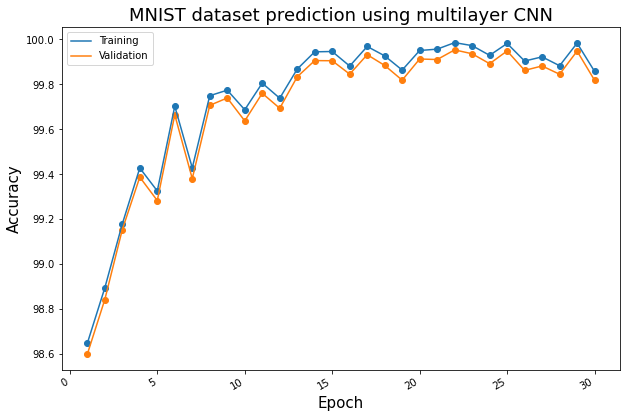

In [26]:

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7))
fig.autofmt_xdate()
legend = np.zeros(6,dtype=object)
#for i in range(2):
x_axis = np.arange(0,30)
y_axis = training_accuracies
plt.scatter(x_axis+1, y_axis)
plt.plot(x_axis+1, y_axis, linestyle='solid')
y_axis = validation_accuracies
plt.scatter(x_axis+1, y_axis)
plt.plot(x_axis+1, y_axis, linestyle='solid')

legend = ("Training","Validation")
ax.legend(legend)
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title("MNIST dataset prediction using multilayer CNN",fontsize=18)
plt.show()

# Train CNN to predict unseen dataset

In [20]:
full_dataset = xTrainingSet + xValidationSet
full_labels = yTrainingSet + yValidationSet

full_dataset_batch, full_labels_batch = create_batches(full_dataset, full_labels, batch_size)

net = Net(h_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)

for epoch in range(max_iters):
    running_loss = 0.0
    
    for i, data in enumerate(full_dataset_batch):
        inputs = torch.from_numpy(data)
        labels = full_labels_batch[i] 
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, torch.from_numpy(np.array(labels).astype(np.longlong)))
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 20 == 19:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

[1,    20] loss: 2.597
[1,    40] loss: 2.160
[1,    60] loss: 1.877
[1,    80] loss: 1.464
[1,   100] loss: 1.053
[1,   120] loss: 0.822
[1,   140] loss: 0.768
[1,   160] loss: 0.721
[1,   180] loss: 0.615
[1,   200] loss: 0.385
[1,   220] loss: 0.324
[1,   240] loss: 0.418
[1,   260] loss: 0.416
[1,   280] loss: 0.377
[1,   300] loss: 0.400
[1,   320] loss: 0.287
[1,   340] loss: 0.363
[1,   360] loss: 0.349
[1,   380] loss: 0.287
[1,   400] loss: 0.346
[1,   420] loss: 0.264
[1,   440] loss: 0.197
[1,   460] loss: 0.305
[1,   480] loss: 0.296
[1,   500] loss: 0.255
[1,   520] loss: 0.180
[1,   540] loss: 0.220
[1,   560] loss: 0.240
[1,   580] loss: 0.220
[1,   600] loss: 0.186
[1,   620] loss: 0.301
[1,   640] loss: 0.187
[1,   660] loss: 0.226
[1,   680] loss: 0.203
[1,   700] loss: 0.272
[1,   720] loss: 0.237
[1,   740] loss: 0.128
[1,   760] loss: 0.207
[1,   780] loss: 0.144
[1,   800] loss: 0.204
[1,   820] loss: 0.175
[1,   840] loss: 0.148
[1,   860] loss: 0.209
[1,   880] 

[1,  7160] loss: 0.081
[1,  7180] loss: 0.057
[1,  7200] loss: 0.054
[1,  7220] loss: 0.116
[1,  7240] loss: 0.134
[1,  7260] loss: 0.045
[1,  7280] loss: 0.077
[1,  7300] loss: 0.071
[1,  7320] loss: 0.033
[1,  7340] loss: 0.060
[1,  7360] loss: 0.047
[1,  7380] loss: 0.038
[1,  7400] loss: 0.110
[1,  7420] loss: 0.031
[1,  7440] loss: 0.054
[1,  7460] loss: 0.067
[1,  7480] loss: 0.078
[1,  7500] loss: 0.106
[1,  7520] loss: 0.094
[1,  7540] loss: 0.095
[1,  7560] loss: 0.065
[1,  7580] loss: 0.048
[1,  7600] loss: 0.087
[1,  7620] loss: 0.047
[1,  7640] loss: 0.080
[1,  7660] loss: 0.048
[1,  7680] loss: 0.041
[1,  7700] loss: 0.052
[1,  7720] loss: 0.048
[1,  7740] loss: 0.032
[1,  7760] loss: 0.014
[1,  7780] loss: 0.091
[1,  7800] loss: 0.045
[1,  7820] loss: 0.045
[1,  7840] loss: 0.031
[1,  7860] loss: 0.036
[1,  7880] loss: 0.077
[1,  7900] loss: 0.059
[1,  7920] loss: 0.020
[1,  7940] loss: 0.081
[1,  7960] loss: 0.046
[1,  7980] loss: 0.055
[1,  8000] loss: 0.084
[1,  8020] 

[2,  4440] loss: 0.029
[2,  4460] loss: 0.027
[2,  4480] loss: 0.024
[2,  4500] loss: 0.008
[2,  4520] loss: 0.011
[2,  4540] loss: 0.037
[2,  4560] loss: 0.028
[2,  4580] loss: 0.032
[2,  4600] loss: 0.071
[2,  4620] loss: 0.054
[2,  4640] loss: 0.037
[2,  4660] loss: 0.012
[2,  4680] loss: 0.027
[2,  4700] loss: 0.019
[2,  4720] loss: 0.054
[2,  4740] loss: 0.068
[2,  4760] loss: 0.042
[2,  4780] loss: 0.026
[2,  4800] loss: 0.079
[2,  4820] loss: 0.038
[2,  4840] loss: 0.043
[2,  4860] loss: 0.023
[2,  4880] loss: 0.029
[2,  4900] loss: 0.018
[2,  4920] loss: 0.022
[2,  4940] loss: 0.053
[2,  4960] loss: 0.049
[2,  4980] loss: 0.038
[2,  5000] loss: 0.076
[2,  5020] loss: 0.061
[2,  5040] loss: 0.057
[2,  5060] loss: 0.065
[2,  5080] loss: 0.057
[2,  5100] loss: 0.038
[2,  5120] loss: 0.043
[2,  5140] loss: 0.019
[2,  5160] loss: 0.032
[2,  5180] loss: 0.110
[2,  5200] loss: 0.017
[2,  5220] loss: 0.024
[2,  5240] loss: 0.017
[2,  5260] loss: 0.026
[2,  5280] loss: 0.015
[2,  5300] 

[3,  1720] loss: 0.019
[3,  1740] loss: 0.023
[3,  1760] loss: 0.065
[3,  1780] loss: 0.034
[3,  1800] loss: 0.017
[3,  1820] loss: 0.029
[3,  1840] loss: 0.035
[3,  1860] loss: 0.017
[3,  1880] loss: 0.005
[3,  1900] loss: 0.016
[3,  1920] loss: 0.021
[3,  1940] loss: 0.026
[3,  1960] loss: 0.017
[3,  1980] loss: 0.029
[3,  2000] loss: 0.038
[3,  2020] loss: 0.025
[3,  2040] loss: 0.121
[3,  2060] loss: 0.050
[3,  2080] loss: 0.020
[3,  2100] loss: 0.017
[3,  2120] loss: 0.028
[3,  2140] loss: 0.047
[3,  2160] loss: 0.026
[3,  2180] loss: 0.022
[3,  2200] loss: 0.020
[3,  2220] loss: 0.040
[3,  2240] loss: 0.027
[3,  2260] loss: 0.012
[3,  2280] loss: 0.011
[3,  2300] loss: 0.012
[3,  2320] loss: 0.028
[3,  2340] loss: 0.045
[3,  2360] loss: 0.009
[3,  2380] loss: 0.025
[3,  2400] loss: 0.021
[3,  2420] loss: 0.029
[3,  2440] loss: 0.020
[3,  2460] loss: 0.013
[3,  2480] loss: 0.039
[3,  2500] loss: 0.053
[3,  2520] loss: 0.039
[3,  2540] loss: 0.011
[3,  2560] loss: 0.018
[3,  2580] 

[3,  8860] loss: 0.018
[3,  8880] loss: 0.010
[3,  8900] loss: 0.010
[3,  8920] loss: 0.012
[3,  8940] loss: 0.024
[3,  8960] loss: 0.026
[3,  8980] loss: 0.014
[3,  9000] loss: 0.007
[3,  9020] loss: 0.018
[3,  9040] loss: 0.018
[3,  9060] loss: 0.022
[3,  9080] loss: 0.029
[3,  9100] loss: 0.019
[3,  9120] loss: 0.019
[3,  9140] loss: 0.029
[3,  9160] loss: 0.011
[3,  9180] loss: 0.053
[3,  9200] loss: 0.020
[3,  9220] loss: 0.007
[3,  9240] loss: 0.025
[3,  9260] loss: 0.028
[3,  9280] loss: 0.028
[3,  9300] loss: 0.020
[3,  9320] loss: 0.031
[3,  9340] loss: 0.015
[3,  9360] loss: 0.029
[3,  9380] loss: 0.010
[3,  9400] loss: 0.019
[3,  9420] loss: 0.015
[3,  9440] loss: 0.005
[3,  9460] loss: 0.006
[3,  9480] loss: 0.007
[3,  9500] loss: 0.004
[3,  9520] loss: 0.035
[3,  9540] loss: 0.010
[3,  9560] loss: 0.003
[3,  9580] loss: 0.024
[3,  9600] loss: 0.015
[3,  9620] loss: 0.009
[3,  9640] loss: 0.016
[3,  9660] loss: 0.015
[3,  9680] loss: 0.011
[3,  9700] loss: 0.008
[3,  9720] 

[4,  6140] loss: 0.007
[4,  6160] loss: 0.018
[4,  6180] loss: 0.003
[4,  6200] loss: 0.013
[4,  6220] loss: 0.017
[4,  6240] loss: 0.022
[4,  6260] loss: 0.039
[4,  6280] loss: 0.025
[4,  6300] loss: 0.012
[4,  6320] loss: 0.015
[4,  6340] loss: 0.007
[4,  6360] loss: 0.007
[4,  6380] loss: 0.024
[4,  6400] loss: 0.010
[4,  6420] loss: 0.004
[4,  6440] loss: 0.035
[4,  6460] loss: 0.030
[4,  6480] loss: 0.021
[4,  6500] loss: 0.022
[4,  6520] loss: 0.018
[4,  6540] loss: 0.016
[4,  6560] loss: 0.042
[4,  6580] loss: 0.015
[4,  6600] loss: 0.005
[4,  6620] loss: 0.011
[4,  6640] loss: 0.066
[4,  6660] loss: 0.014
[4,  6680] loss: 0.031
[4,  6700] loss: 0.010
[4,  6720] loss: 0.012
[4,  6740] loss: 0.012
[4,  6760] loss: 0.021
[4,  6780] loss: 0.022
[4,  6800] loss: 0.031
[4,  6820] loss: 0.024
[4,  6840] loss: 0.016
[4,  6860] loss: 0.055
[4,  6880] loss: 0.026
[4,  6900] loss: 0.013
[4,  6920] loss: 0.010
[4,  6940] loss: 0.014
[4,  6960] loss: 0.029
[4,  6980] loss: 0.015
[4,  7000] 

[5,  3420] loss: 0.015
[5,  3440] loss: 0.034
[5,  3460] loss: 0.010
[5,  3480] loss: 0.010
[5,  3500] loss: 0.017
[5,  3520] loss: 0.006
[5,  3540] loss: 0.008
[5,  3560] loss: 0.004
[5,  3580] loss: 0.016
[5,  3600] loss: 0.011
[5,  3620] loss: 0.005
[5,  3640] loss: 0.002
[5,  3660] loss: 0.003
[5,  3680] loss: 0.011
[5,  3700] loss: 0.006
[5,  3720] loss: 0.005
[5,  3740] loss: 0.003
[5,  3760] loss: 0.002
[5,  3780] loss: 0.006
[5,  3800] loss: 0.005
[5,  3820] loss: 0.008
[5,  3840] loss: 0.002
[5,  3860] loss: 0.006
[5,  3880] loss: 0.019
[5,  3900] loss: 0.029
[5,  3920] loss: 0.010
[5,  3940] loss: 0.022
[5,  3960] loss: 0.011
[5,  3980] loss: 0.034
[5,  4000] loss: 0.030
[5,  4020] loss: 0.018
[5,  4040] loss: 0.024
[5,  4060] loss: 0.032
[5,  4080] loss: 0.011
[5,  4100] loss: 0.028
[5,  4120] loss: 0.010
[5,  4140] loss: 0.018
[5,  4160] loss: 0.004
[5,  4180] loss: 0.001
[5,  4200] loss: 0.019
[5,  4220] loss: 0.012
[5,  4240] loss: 0.005
[5,  4260] loss: 0.008
[5,  4280] 

[6,   700] loss: 0.019
[6,   720] loss: 0.005
[6,   740] loss: 0.002
[6,   760] loss: 0.016
[6,   780] loss: 0.017
[6,   800] loss: 0.010
[6,   820] loss: 0.029
[6,   840] loss: 0.002
[6,   860] loss: 0.004
[6,   880] loss: 0.006
[6,   900] loss: 0.015
[6,   920] loss: 0.009
[6,   940] loss: 0.007
[6,   960] loss: 0.018
[6,   980] loss: 0.011
[6,  1000] loss: 0.030
[6,  1020] loss: 0.010
[6,  1040] loss: 0.003
[6,  1060] loss: 0.003
[6,  1080] loss: 0.005
[6,  1100] loss: 0.005
[6,  1120] loss: 0.017
[6,  1140] loss: 0.005
[6,  1160] loss: 0.012
[6,  1180] loss: 0.005
[6,  1200] loss: 0.031
[6,  1220] loss: 0.006
[6,  1240] loss: 0.005
[6,  1260] loss: 0.008
[6,  1280] loss: 0.001
[6,  1300] loss: 0.017
[6,  1320] loss: 0.003
[6,  1340] loss: 0.002
[6,  1360] loss: 0.034
[6,  1380] loss: 0.010
[6,  1400] loss: 0.010
[6,  1420] loss: 0.029
[6,  1440] loss: 0.002
[6,  1460] loss: 0.009
[6,  1480] loss: 0.002
[6,  1500] loss: 0.003
[6,  1520] loss: 0.003
[6,  1540] loss: 0.009
[6,  1560] 

[6,  7840] loss: 0.017
[6,  7860] loss: 0.002
[6,  7880] loss: 0.005
[6,  7900] loss: 0.006
[6,  7920] loss: 0.020
[6,  7940] loss: 0.013
[6,  7960] loss: 0.007
[6,  7980] loss: 0.009
[6,  8000] loss: 0.014
[6,  8020] loss: 0.017
[6,  8040] loss: 0.013
[6,  8060] loss: 0.017
[6,  8080] loss: 0.006
[6,  8100] loss: 0.018
[6,  8120] loss: 0.001
[6,  8140] loss: 0.008
[6,  8160] loss: 0.013
[6,  8180] loss: 0.004
[6,  8200] loss: 0.007
[6,  8220] loss: 0.006
[6,  8240] loss: 0.003
[6,  8260] loss: 0.007
[6,  8280] loss: 0.028
[6,  8300] loss: 0.030
[6,  8320] loss: 0.011
[6,  8340] loss: 0.003
[6,  8360] loss: 0.016
[6,  8380] loss: 0.003
[6,  8400] loss: 0.011
[6,  8420] loss: 0.015
[6,  8440] loss: 0.010
[6,  8460] loss: 0.022
[6,  8480] loss: 0.012
[6,  8500] loss: 0.021
[6,  8520] loss: 0.074
[6,  8540] loss: 0.011
[6,  8560] loss: 0.005
[6,  8580] loss: 0.006
[6,  8600] loss: 0.013
[6,  8620] loss: 0.014
[6,  8640] loss: 0.027
[6,  8660] loss: 0.014
[6,  8680] loss: 0.003
[6,  8700] 

[7,  5120] loss: 0.007
[7,  5140] loss: 0.000
[7,  5160] loss: 0.005
[7,  5180] loss: 0.006
[7,  5200] loss: 0.002
[7,  5220] loss: 0.010
[7,  5240] loss: 0.008
[7,  5260] loss: 0.003
[7,  5280] loss: 0.003
[7,  5300] loss: 0.004
[7,  5320] loss: 0.005
[7,  5340] loss: 0.024
[7,  5360] loss: 0.009
[7,  5380] loss: 0.013
[7,  5400] loss: 0.016
[7,  5420] loss: 0.022
[7,  5440] loss: 0.004
[7,  5460] loss: 0.008
[7,  5480] loss: 0.009
[7,  5500] loss: 0.014
[7,  5520] loss: 0.017
[7,  5540] loss: 0.035
[7,  5560] loss: 0.026
[7,  5580] loss: 0.022
[7,  5600] loss: 0.060
[7,  5620] loss: 0.014
[7,  5640] loss: 0.004
[7,  5660] loss: 0.002
[7,  5680] loss: 0.003
[7,  5700] loss: 0.003
[7,  5720] loss: 0.000
[7,  5740] loss: 0.015
[7,  5760] loss: 0.007
[7,  5780] loss: 0.017
[7,  5800] loss: 0.011
[7,  5820] loss: 0.005
[7,  5840] loss: 0.001
[7,  5860] loss: 0.008
[7,  5880] loss: 0.021
[7,  5900] loss: 0.015
[7,  5920] loss: 0.005
[7,  5940] loss: 0.017
[7,  5960] loss: 0.001
[7,  5980] 

[8,  2400] loss: 0.003
[8,  2420] loss: 0.003
[8,  2440] loss: 0.008
[8,  2460] loss: 0.001
[8,  2480] loss: 0.007
[8,  2500] loss: 0.019
[8,  2520] loss: 0.022
[8,  2540] loss: 0.001
[8,  2560] loss: 0.002
[8,  2580] loss: 0.001
[8,  2600] loss: 0.002
[8,  2620] loss: 0.003
[8,  2640] loss: 0.001
[8,  2660] loss: 0.004
[8,  2680] loss: 0.003
[8,  2700] loss: 0.008
[8,  2720] loss: 0.005
[8,  2740] loss: 0.004
[8,  2760] loss: 0.036
[8,  2780] loss: 0.029
[8,  2800] loss: 0.003
[8,  2820] loss: 0.033
[8,  2840] loss: 0.009
[8,  2860] loss: 0.011
[8,  2880] loss: 0.002
[8,  2900] loss: 0.014
[8,  2920] loss: 0.002
[8,  2940] loss: 0.007
[8,  2960] loss: 0.011
[8,  2980] loss: 0.009
[8,  3000] loss: 0.010
[8,  3020] loss: 0.022
[8,  3040] loss: 0.005
[8,  3060] loss: 0.011
[8,  3080] loss: 0.003
[8,  3100] loss: 0.012
[8,  3120] loss: 0.003
[8,  3140] loss: 0.009
[8,  3160] loss: 0.004
[8,  3180] loss: 0.003
[8,  3200] loss: 0.004
[8,  3220] loss: 0.007
[8,  3240] loss: 0.007
[8,  3260] 

[8,  9540] loss: 0.004
[8,  9560] loss: 0.001
[8,  9580] loss: 0.013
[8,  9600] loss: 0.004
[8,  9620] loss: 0.002
[8,  9640] loss: 0.004
[8,  9660] loss: 0.002
[8,  9680] loss: 0.008
[8,  9700] loss: 0.007
[8,  9720] loss: 0.001
[8,  9740] loss: 0.001
[8,  9760] loss: 0.007
[8,  9780] loss: 0.008
[8,  9800] loss: 0.002
[8,  9820] loss: 0.001
[8,  9840] loss: 0.004
[8,  9860] loss: 0.004
[9,    20] loss: 0.002
[9,    40] loss: 0.004
[9,    60] loss: 0.003
[9,    80] loss: 0.000
[9,   100] loss: 0.008
[9,   120] loss: 0.001
[9,   140] loss: 0.003
[9,   160] loss: 0.003
[9,   180] loss: 0.001
[9,   200] loss: 0.007
[9,   220] loss: 0.001
[9,   240] loss: 0.001
[9,   260] loss: 0.002
[9,   280] loss: 0.004
[9,   300] loss: 0.004
[9,   320] loss: 0.005
[9,   340] loss: 0.000
[9,   360] loss: 0.002
[9,   380] loss: 0.001
[9,   400] loss: 0.001
[9,   420] loss: 0.024
[9,   440] loss: 0.005
[9,   460] loss: 0.012
[9,   480] loss: 0.016
[9,   500] loss: 0.000
[9,   520] loss: 0.000
[9,   540] 

[9,  6820] loss: 0.012
[9,  6840] loss: 0.010
[9,  6860] loss: 0.040
[9,  6880] loss: 0.008
[9,  6900] loss: 0.017
[9,  6920] loss: 0.003
[9,  6940] loss: 0.010
[9,  6960] loss: 0.001
[9,  6980] loss: 0.010
[9,  7000] loss: 0.005
[9,  7020] loss: 0.000
[9,  7040] loss: 0.018
[9,  7060] loss: 0.002
[9,  7080] loss: 0.001
[9,  7100] loss: 0.003
[9,  7120] loss: 0.001
[9,  7140] loss: 0.001
[9,  7160] loss: 0.004
[9,  7180] loss: 0.001
[9,  7200] loss: 0.010
[9,  7220] loss: 0.002
[9,  7240] loss: 0.019
[9,  7260] loss: 0.002
[9,  7280] loss: 0.001
[9,  7300] loss: 0.015
[9,  7320] loss: 0.009
[9,  7340] loss: 0.004
[9,  7360] loss: 0.002
[9,  7380] loss: 0.000
[9,  7400] loss: 0.001
[9,  7420] loss: 0.001
[9,  7440] loss: 0.000
[9,  7460] loss: 0.011
[9,  7480] loss: 0.007
[9,  7500] loss: 0.013
[9,  7520] loss: 0.003
[9,  7540] loss: 0.014
[9,  7560] loss: 0.039
[9,  7580] loss: 0.008
[9,  7600] loss: 0.014
[9,  7620] loss: 0.003
[9,  7640] loss: 0.009
[9,  7660] loss: 0.010
[9,  7680] 

[10,  3920] loss: 0.009
[10,  3940] loss: 0.014
[10,  3960] loss: 0.008
[10,  3980] loss: 0.000
[10,  4000] loss: 0.007
[10,  4020] loss: 0.009
[10,  4040] loss: 0.001
[10,  4060] loss: 0.000
[10,  4080] loss: 0.000
[10,  4100] loss: 0.008
[10,  4120] loss: 0.001
[10,  4140] loss: 0.001
[10,  4160] loss: 0.004
[10,  4180] loss: 0.001
[10,  4200] loss: 0.002
[10,  4220] loss: 0.000
[10,  4240] loss: 0.000
[10,  4260] loss: 0.001
[10,  4280] loss: 0.009
[10,  4300] loss: 0.003
[10,  4320] loss: 0.004
[10,  4340] loss: 0.021
[10,  4360] loss: 0.005
[10,  4380] loss: 0.001
[10,  4400] loss: 0.000
[10,  4420] loss: 0.012
[10,  4440] loss: 0.012
[10,  4460] loss: 0.001
[10,  4480] loss: 0.003
[10,  4500] loss: 0.000
[10,  4520] loss: 0.000
[10,  4540] loss: 0.009
[10,  4560] loss: 0.003
[10,  4580] loss: 0.005
[10,  4600] loss: 0.001
[10,  4620] loss: 0.003
[10,  4640] loss: 0.003
[10,  4660] loss: 0.020
[10,  4680] loss: 0.003
[10,  4700] loss: 0.001
[10,  4720] loss: 0.003
[10,  4740] loss

[11,   900] loss: 0.006
[11,   920] loss: 0.002
[11,   940] loss: 0.001
[11,   960] loss: 0.000
[11,   980] loss: 0.001
[11,  1000] loss: 0.004
[11,  1020] loss: 0.001
[11,  1040] loss: 0.001
[11,  1060] loss: 0.002
[11,  1080] loss: 0.000
[11,  1100] loss: 0.001
[11,  1120] loss: 0.000
[11,  1140] loss: 0.000
[11,  1160] loss: 0.004
[11,  1180] loss: 0.002
[11,  1200] loss: 0.010
[11,  1220] loss: 0.001
[11,  1240] loss: 0.006
[11,  1260] loss: 0.001
[11,  1280] loss: 0.009
[11,  1300] loss: 0.006
[11,  1320] loss: 0.001
[11,  1340] loss: 0.001
[11,  1360] loss: 0.004
[11,  1380] loss: 0.002
[11,  1400] loss: 0.044
[11,  1420] loss: 0.005
[11,  1440] loss: 0.010
[11,  1460] loss: 0.018
[11,  1480] loss: 0.026
[11,  1500] loss: 0.003
[11,  1520] loss: 0.014
[11,  1540] loss: 0.006
[11,  1560] loss: 0.019
[11,  1580] loss: 0.024
[11,  1600] loss: 0.019
[11,  1620] loss: 0.004
[11,  1640] loss: 0.013
[11,  1660] loss: 0.006
[11,  1680] loss: 0.002
[11,  1700] loss: 0.006
[11,  1720] loss

[11,  7740] loss: 0.001
[11,  7760] loss: 0.001
[11,  7780] loss: 0.008
[11,  7800] loss: 0.023
[11,  7820] loss: 0.001
[11,  7840] loss: 0.000
[11,  7860] loss: 0.006
[11,  7880] loss: 0.004
[11,  7900] loss: 0.000
[11,  7920] loss: 0.006
[11,  7940] loss: 0.011
[11,  7960] loss: 0.005
[11,  7980] loss: 0.013
[11,  8000] loss: 0.023
[11,  8020] loss: 0.025
[11,  8040] loss: 0.006
[11,  8060] loss: 0.005
[11,  8080] loss: 0.001
[11,  8100] loss: 0.002
[11,  8120] loss: 0.004
[11,  8140] loss: 0.005
[11,  8160] loss: 0.002
[11,  8180] loss: 0.005
[11,  8200] loss: 0.005
[11,  8220] loss: 0.007
[11,  8240] loss: 0.011
[11,  8260] loss: 0.013
[11,  8280] loss: 0.001
[11,  8300] loss: 0.028
[11,  8320] loss: 0.007
[11,  8340] loss: 0.006
[11,  8360] loss: 0.005
[11,  8380] loss: 0.006
[11,  8400] loss: 0.006
[11,  8420] loss: 0.057
[11,  8440] loss: 0.011
[11,  8460] loss: 0.009
[11,  8480] loss: 0.001
[11,  8500] loss: 0.003
[11,  8520] loss: 0.037
[11,  8540] loss: 0.007
[11,  8560] loss

[12,  4720] loss: 0.003
[12,  4740] loss: 0.001
[12,  4760] loss: 0.003
[12,  4780] loss: 0.002
[12,  4800] loss: 0.000
[12,  4820] loss: 0.001
[12,  4840] loss: 0.003
[12,  4860] loss: 0.001
[12,  4880] loss: 0.001
[12,  4900] loss: 0.000
[12,  4920] loss: 0.014
[12,  4940] loss: 0.002
[12,  4960] loss: 0.000
[12,  4980] loss: 0.000
[12,  5000] loss: 0.005
[12,  5020] loss: 0.004
[12,  5040] loss: 0.000
[12,  5060] loss: 0.000
[12,  5080] loss: 0.009
[12,  5100] loss: 0.004
[12,  5120] loss: 0.001
[12,  5140] loss: 0.000
[12,  5160] loss: 0.007
[12,  5180] loss: 0.035
[12,  5200] loss: 0.008
[12,  5220] loss: 0.001
[12,  5240] loss: 0.004
[12,  5260] loss: 0.000
[12,  5280] loss: 0.001
[12,  5300] loss: 0.002
[12,  5320] loss: 0.004
[12,  5340] loss: 0.000
[12,  5360] loss: 0.000
[12,  5380] loss: 0.012
[12,  5400] loss: 0.004
[12,  5420] loss: 0.001
[12,  5440] loss: 0.009
[12,  5460] loss: 0.017
[12,  5480] loss: 0.011
[12,  5500] loss: 0.000
[12,  5520] loss: 0.001
[12,  5540] loss

[13,  1700] loss: 0.005
[13,  1720] loss: 0.001
[13,  1740] loss: 0.004
[13,  1760] loss: 0.002
[13,  1780] loss: 0.005
[13,  1800] loss: 0.009
[13,  1820] loss: 0.007
[13,  1840] loss: 0.001
[13,  1860] loss: 0.001
[13,  1880] loss: 0.004
[13,  1900] loss: 0.006
[13,  1920] loss: 0.001
[13,  1940] loss: 0.001
[13,  1960] loss: 0.002
[13,  1980] loss: 0.000
[13,  2000] loss: 0.000
[13,  2020] loss: 0.001
[13,  2040] loss: 0.005
[13,  2060] loss: 0.005
[13,  2080] loss: 0.001
[13,  2100] loss: 0.001
[13,  2120] loss: 0.013
[13,  2140] loss: 0.014
[13,  2160] loss: 0.007
[13,  2180] loss: 0.001
[13,  2200] loss: 0.010
[13,  2220] loss: 0.004
[13,  2240] loss: 0.004
[13,  2260] loss: 0.000
[13,  2280] loss: 0.004
[13,  2300] loss: 0.001
[13,  2320] loss: 0.001
[13,  2340] loss: 0.015
[13,  2360] loss: 0.001
[13,  2380] loss: 0.004
[13,  2400] loss: 0.001
[13,  2420] loss: 0.000
[13,  2440] loss: 0.004
[13,  2460] loss: 0.000
[13,  2480] loss: 0.007
[13,  2500] loss: 0.004
[13,  2520] loss

[13,  8540] loss: 0.016
[13,  8560] loss: 0.002
[13,  8580] loss: 0.010
[13,  8600] loss: 0.018
[13,  8620] loss: 0.007
[13,  8640] loss: 0.004
[13,  8660] loss: 0.001
[13,  8680] loss: 0.002
[13,  8700] loss: 0.006
[13,  8720] loss: 0.001
[13,  8740] loss: 0.000
[13,  8760] loss: 0.001
[13,  8780] loss: 0.001
[13,  8800] loss: 0.003
[13,  8820] loss: 0.001
[13,  8840] loss: 0.000
[13,  8860] loss: 0.001
[13,  8880] loss: 0.000
[13,  8900] loss: 0.002
[13,  8920] loss: 0.002
[13,  8940] loss: 0.002
[13,  8960] loss: 0.001
[13,  8980] loss: 0.004
[13,  9000] loss: 0.009
[13,  9020] loss: 0.007
[13,  9040] loss: 0.002
[13,  9060] loss: 0.000
[13,  9080] loss: 0.001
[13,  9100] loss: 0.008
[13,  9120] loss: 0.003
[13,  9140] loss: 0.008
[13,  9160] loss: 0.001
[13,  9180] loss: 0.002
[13,  9200] loss: 0.011
[13,  9220] loss: 0.002
[13,  9240] loss: 0.010
[13,  9260] loss: 0.010
[13,  9280] loss: 0.002
[13,  9300] loss: 0.003
[13,  9320] loss: 0.001
[13,  9340] loss: 0.007
[13,  9360] loss

[14,  5520] loss: 0.001
[14,  5540] loss: 0.003
[14,  5560] loss: 0.000
[14,  5580] loss: 0.001
[14,  5600] loss: 0.001
[14,  5620] loss: 0.000
[14,  5640] loss: 0.001
[14,  5660] loss: 0.000
[14,  5680] loss: 0.000
[14,  5700] loss: 0.001
[14,  5720] loss: 0.000
[14,  5740] loss: 0.001
[14,  5760] loss: 0.001
[14,  5780] loss: 0.003
[14,  5800] loss: 0.009
[14,  5820] loss: 0.002
[14,  5840] loss: 0.003
[14,  5860] loss: 0.002
[14,  5880] loss: 0.000
[14,  5900] loss: 0.003
[14,  5920] loss: 0.010
[14,  5940] loss: 0.000
[14,  5960] loss: 0.004
[14,  5980] loss: 0.000
[14,  6000] loss: 0.006
[14,  6020] loss: 0.000
[14,  6040] loss: 0.005
[14,  6060] loss: 0.004
[14,  6080] loss: 0.016
[14,  6100] loss: 0.016
[14,  6120] loss: 0.001
[14,  6140] loss: 0.006
[14,  6160] loss: 0.001
[14,  6180] loss: 0.001
[14,  6200] loss: 0.001
[14,  6220] loss: 0.000
[14,  6240] loss: 0.009
[14,  6260] loss: 0.038
[14,  6280] loss: 0.007
[14,  6300] loss: 0.003
[14,  6320] loss: 0.040
[14,  6340] loss

[15,  2500] loss: 0.003
[15,  2520] loss: 0.001
[15,  2540] loss: 0.000
[15,  2560] loss: 0.003
[15,  2580] loss: 0.000
[15,  2600] loss: 0.000
[15,  2620] loss: 0.000
[15,  2640] loss: 0.002
[15,  2660] loss: 0.001
[15,  2680] loss: 0.000
[15,  2700] loss: 0.001
[15,  2720] loss: 0.006
[15,  2740] loss: 0.008
[15,  2760] loss: 0.007
[15,  2780] loss: 0.011
[15,  2800] loss: 0.003
[15,  2820] loss: 0.011
[15,  2840] loss: 0.001
[15,  2860] loss: 0.001
[15,  2880] loss: 0.001
[15,  2900] loss: 0.000
[15,  2920] loss: 0.002
[15,  2940] loss: 0.002
[15,  2960] loss: 0.000
[15,  2980] loss: 0.000
[15,  3000] loss: 0.001
[15,  3020] loss: 0.001
[15,  3040] loss: 0.000
[15,  3060] loss: 0.000
[15,  3080] loss: 0.000
[15,  3100] loss: 0.013
[15,  3120] loss: 0.001
[15,  3140] loss: 0.003
[15,  3160] loss: 0.005
[15,  3180] loss: 0.006
[15,  3200] loss: 0.025
[15,  3220] loss: 0.003
[15,  3240] loss: 0.003
[15,  3260] loss: 0.001
[15,  3280] loss: 0.019
[15,  3300] loss: 0.002
[15,  3320] loss

[15,  9340] loss: 0.001
[15,  9360] loss: 0.002
[15,  9380] loss: 0.000
[15,  9400] loss: 0.003
[15,  9420] loss: 0.000
[15,  9440] loss: 0.000
[15,  9460] loss: 0.000
[15,  9480] loss: 0.009
[15,  9500] loss: 0.002
[15,  9520] loss: 0.008
[15,  9540] loss: 0.004
[15,  9560] loss: 0.002
[15,  9580] loss: 0.001
[15,  9600] loss: 0.001
[15,  9620] loss: 0.001
[15,  9640] loss: 0.006
[15,  9660] loss: 0.003
[15,  9680] loss: 0.007
[15,  9700] loss: 0.011
[15,  9720] loss: 0.003
[15,  9740] loss: 0.004
[15,  9760] loss: 0.000
[15,  9780] loss: 0.001
[15,  9800] loss: 0.000
[15,  9820] loss: 0.001
[15,  9840] loss: 0.000
[15,  9860] loss: 0.009
[16,    20] loss: 0.001
[16,    40] loss: 0.001
[16,    60] loss: 0.003
[16,    80] loss: 0.000
[16,   100] loss: 0.000
[16,   120] loss: 0.002
[16,   140] loss: 0.001
[16,   160] loss: 0.000
[16,   180] loss: 0.000
[16,   200] loss: 0.000
[16,   220] loss: 0.000
[16,   240] loss: 0.001
[16,   260] loss: 0.000
[16,   280] loss: 0.000
[16,   300] loss

[16,  6320] loss: 0.001
[16,  6340] loss: 0.000
[16,  6360] loss: 0.001
[16,  6380] loss: 0.000
[16,  6400] loss: 0.002
[16,  6420] loss: 0.000
[16,  6440] loss: 0.001
[16,  6460] loss: 0.002
[16,  6480] loss: 0.000
[16,  6500] loss: 0.001
[16,  6520] loss: 0.001
[16,  6540] loss: 0.008
[16,  6560] loss: 0.009
[16,  6580] loss: 0.002
[16,  6600] loss: 0.004
[16,  6620] loss: 0.001
[16,  6640] loss: 0.000
[16,  6660] loss: 0.002
[16,  6680] loss: 0.003
[16,  6700] loss: 0.002
[16,  6720] loss: 0.001
[16,  6740] loss: 0.005
[16,  6760] loss: 0.002
[16,  6780] loss: 0.011
[16,  6800] loss: 0.000
[16,  6820] loss: 0.001
[16,  6840] loss: 0.000
[16,  6860] loss: 0.011
[16,  6880] loss: 0.004
[16,  6900] loss: 0.000
[16,  6920] loss: 0.001
[16,  6940] loss: 0.000
[16,  6960] loss: 0.000
[16,  6980] loss: 0.001
[16,  7000] loss: 0.000
[16,  7020] loss: 0.002
[16,  7040] loss: 0.030
[16,  7060] loss: 0.001
[16,  7080] loss: 0.006
[16,  7100] loss: 0.000
[16,  7120] loss: 0.001
[16,  7140] loss

[17,  3300] loss: 0.005
[17,  3320] loss: 0.001
[17,  3340] loss: 0.000
[17,  3360] loss: 0.014
[17,  3380] loss: 0.007
[17,  3400] loss: 0.005
[17,  3420] loss: 0.000
[17,  3440] loss: 0.009
[17,  3460] loss: 0.001
[17,  3480] loss: 0.001
[17,  3500] loss: 0.001
[17,  3520] loss: 0.001
[17,  3540] loss: 0.001
[17,  3560] loss: 0.001
[17,  3580] loss: 0.001
[17,  3600] loss: 0.013
[17,  3620] loss: 0.000
[17,  3640] loss: 0.000
[17,  3660] loss: 0.005
[17,  3680] loss: 0.001
[17,  3700] loss: 0.006
[17,  3720] loss: 0.002
[17,  3740] loss: 0.025
[17,  3760] loss: 0.000
[17,  3780] loss: 0.008
[17,  3800] loss: 0.025
[17,  3820] loss: 0.001
[17,  3840] loss: 0.025
[17,  3860] loss: 0.012
[17,  3880] loss: 0.002
[17,  3900] loss: 0.012
[17,  3920] loss: 0.001
[17,  3940] loss: 0.002
[17,  3960] loss: 0.004
[17,  3980] loss: 0.004
[17,  4000] loss: 0.001
[17,  4020] loss: 0.000
[17,  4040] loss: 0.000
[17,  4060] loss: 0.008
[17,  4080] loss: 0.001
[17,  4100] loss: 0.002
[17,  4120] loss

[18,   280] loss: 0.001
[18,   300] loss: 0.002
[18,   320] loss: 0.000
[18,   340] loss: 0.006
[18,   360] loss: 0.000
[18,   380] loss: 0.002
[18,   400] loss: 0.002
[18,   420] loss: 0.005
[18,   440] loss: 0.018
[18,   460] loss: 0.000
[18,   480] loss: 0.000
[18,   500] loss: 0.000
[18,   520] loss: 0.000
[18,   540] loss: 0.000
[18,   560] loss: 0.000
[18,   580] loss: 0.001
[18,   600] loss: 0.000
[18,   620] loss: 0.000
[18,   640] loss: 0.001
[18,   660] loss: 0.000
[18,   680] loss: 0.006
[18,   700] loss: 0.010
[18,   720] loss: 0.035
[18,   740] loss: 0.006
[18,   760] loss: 0.003
[18,   780] loss: 0.000
[18,   800] loss: 0.001
[18,   820] loss: 0.006
[18,   840] loss: 0.001
[18,   860] loss: 0.000
[18,   880] loss: 0.005
[18,   900] loss: 0.000
[18,   920] loss: 0.000
[18,   940] loss: 0.002
[18,   960] loss: 0.001
[18,   980] loss: 0.001
[18,  1000] loss: 0.000
[18,  1020] loss: 0.000
[18,  1040] loss: 0.000
[18,  1060] loss: 0.000
[18,  1080] loss: 0.000
[18,  1100] loss

[18,  7120] loss: 0.000
[18,  7140] loss: 0.000
[18,  7160] loss: 0.003
[18,  7180] loss: 0.007
[18,  7200] loss: 0.001
[18,  7220] loss: 0.000
[18,  7240] loss: 0.001
[18,  7260] loss: 0.000
[18,  7280] loss: 0.000
[18,  7300] loss: 0.001
[18,  7320] loss: 0.000
[18,  7340] loss: 0.004
[18,  7360] loss: 0.006
[18,  7380] loss: 0.002
[18,  7400] loss: 0.010
[18,  7420] loss: 0.002
[18,  7440] loss: 0.000
[18,  7460] loss: 0.004
[18,  7480] loss: 0.000
[18,  7500] loss: 0.008
[18,  7520] loss: 0.001
[18,  7540] loss: 0.001
[18,  7560] loss: 0.013
[18,  7580] loss: 0.003
[18,  7600] loss: 0.001
[18,  7620] loss: 0.000
[18,  7640] loss: 0.003
[18,  7660] loss: 0.013
[18,  7680] loss: 0.000
[18,  7700] loss: 0.011
[18,  7720] loss: 0.000
[18,  7740] loss: 0.023
[18,  7760] loss: 0.002
[18,  7780] loss: 0.001
[18,  7800] loss: 0.000
[18,  7820] loss: 0.001
[18,  7840] loss: 0.000
[18,  7860] loss: 0.000
[18,  7880] loss: 0.001
[18,  7900] loss: 0.000
[18,  7920] loss: 0.000
[18,  7940] loss

[19,  4100] loss: 0.005
[19,  4120] loss: 0.000
[19,  4140] loss: 0.014
[19,  4160] loss: 0.002
[19,  4180] loss: 0.003
[19,  4200] loss: 0.000
[19,  4220] loss: 0.000
[19,  4240] loss: 0.001
[19,  4260] loss: 0.000
[19,  4280] loss: 0.008
[19,  4300] loss: 0.001
[19,  4320] loss: 0.001
[19,  4340] loss: 0.003
[19,  4360] loss: 0.000
[19,  4380] loss: 0.001
[19,  4400] loss: 0.009
[19,  4420] loss: 0.000
[19,  4440] loss: 0.001
[19,  4460] loss: 0.006
[19,  4480] loss: 0.001
[19,  4500] loss: 0.000
[19,  4520] loss: 0.001
[19,  4540] loss: 0.009
[19,  4560] loss: 0.002
[19,  4580] loss: 0.001
[19,  4600] loss: 0.006
[19,  4620] loss: 0.004
[19,  4640] loss: 0.024
[19,  4660] loss: 0.009
[19,  4680] loss: 0.000
[19,  4700] loss: 0.011
[19,  4720] loss: 0.004
[19,  4740] loss: 0.001
[19,  4760] loss: 0.001
[19,  4780] loss: 0.012
[19,  4800] loss: 0.001
[19,  4820] loss: 0.009
[19,  4840] loss: 0.001
[19,  4860] loss: 0.000
[19,  4880] loss: 0.000
[19,  4900] loss: 0.000
[19,  4920] loss

[20,  1080] loss: 0.000
[20,  1100] loss: 0.001
[20,  1120] loss: 0.003
[20,  1140] loss: 0.000
[20,  1160] loss: 0.003
[20,  1180] loss: 0.000
[20,  1200] loss: 0.000
[20,  1220] loss: 0.000
[20,  1240] loss: 0.002
[20,  1260] loss: 0.000
[20,  1280] loss: 0.001
[20,  1300] loss: 0.000
[20,  1320] loss: 0.002
[20,  1340] loss: 0.000
[20,  1360] loss: 0.001
[20,  1380] loss: 0.009
[20,  1400] loss: 0.000
[20,  1420] loss: 0.000
[20,  1440] loss: 0.000
[20,  1460] loss: 0.002
[20,  1480] loss: 0.000
[20,  1500] loss: 0.000
[20,  1520] loss: 0.000
[20,  1540] loss: 0.001
[20,  1560] loss: 0.001
[20,  1580] loss: 0.001
[20,  1600] loss: 0.000
[20,  1620] loss: 0.000
[20,  1640] loss: 0.000
[20,  1660] loss: 0.000
[20,  1680] loss: 0.001
[20,  1700] loss: 0.000
[20,  1720] loss: 0.000
[20,  1740] loss: 0.000
[20,  1760] loss: 0.000
[20,  1780] loss: 0.000
[20,  1800] loss: 0.000
[20,  1820] loss: 0.001
[20,  1840] loss: 0.000
[20,  1860] loss: 0.000
[20,  1880] loss: 0.000
[20,  1900] loss

[20,  7920] loss: 0.014
[20,  7940] loss: 0.001
[20,  7960] loss: 0.009
[20,  7980] loss: 0.000
[20,  8000] loss: 0.002
[20,  8020] loss: 0.011
[20,  8040] loss: 0.007
[20,  8060] loss: 0.020
[20,  8080] loss: 0.001
[20,  8100] loss: 0.005
[20,  8120] loss: 0.002
[20,  8140] loss: 0.000
[20,  8160] loss: 0.007
[20,  8180] loss: 0.001
[20,  8200] loss: 0.001
[20,  8220] loss: 0.003
[20,  8240] loss: 0.000
[20,  8260] loss: 0.001
[20,  8280] loss: 0.010
[20,  8300] loss: 0.001
[20,  8320] loss: 0.005
[20,  8340] loss: 0.001
[20,  8360] loss: 0.001
[20,  8380] loss: 0.000
[20,  8400] loss: 0.017
[20,  8420] loss: 0.004
[20,  8440] loss: 0.005
[20,  8460] loss: 0.000
[20,  8480] loss: 0.001
[20,  8500] loss: 0.008
[20,  8520] loss: 0.004
[20,  8540] loss: 0.015
[20,  8560] loss: 0.017
[20,  8580] loss: 0.016
[20,  8600] loss: 0.001
[20,  8620] loss: 0.004
[20,  8640] loss: 0.002
[20,  8660] loss: 0.001
[20,  8680] loss: 0.000
[20,  8700] loss: 0.001
[20,  8720] loss: 0.000
[20,  8740] loss

[21,  4900] loss: 0.013
[21,  4920] loss: 0.000
[21,  4940] loss: 0.006
[21,  4960] loss: 0.000
[21,  4980] loss: 0.004
[21,  5000] loss: 0.000
[21,  5020] loss: 0.000
[21,  5040] loss: 0.000
[21,  5060] loss: 0.000
[21,  5080] loss: 0.000
[21,  5100] loss: 0.004
[21,  5120] loss: 0.001
[21,  5140] loss: 0.000
[21,  5160] loss: 0.003
[21,  5180] loss: 0.014
[21,  5200] loss: 0.009
[21,  5220] loss: 0.000
[21,  5240] loss: 0.003
[21,  5260] loss: 0.000
[21,  5280] loss: 0.001
[21,  5300] loss: 0.001
[21,  5320] loss: 0.000
[21,  5340] loss: 0.002
[21,  5360] loss: 0.002
[21,  5380] loss: 0.002
[21,  5400] loss: 0.000
[21,  5420] loss: 0.003
[21,  5440] loss: 0.000
[21,  5460] loss: 0.000
[21,  5480] loss: 0.001
[21,  5500] loss: 0.000
[21,  5520] loss: 0.001
[21,  5540] loss: 0.029
[21,  5560] loss: 0.015
[21,  5580] loss: 0.000
[21,  5600] loss: 0.005
[21,  5620] loss: 0.006
[21,  5640] loss: 0.000
[21,  5660] loss: 0.003
[21,  5680] loss: 0.000
[21,  5700] loss: 0.002
[21,  5720] loss

[22,  1880] loss: 0.001
[22,  1900] loss: 0.006
[22,  1920] loss: 0.000
[22,  1940] loss: 0.004
[22,  1960] loss: 0.001
[22,  1980] loss: 0.001
[22,  2000] loss: 0.001
[22,  2020] loss: 0.001
[22,  2040] loss: 0.013
[22,  2060] loss: 0.000
[22,  2080] loss: 0.006
[22,  2100] loss: 0.000
[22,  2120] loss: 0.021
[22,  2140] loss: 0.005
[22,  2160] loss: 0.005
[22,  2180] loss: 0.008
[22,  2200] loss: 0.002
[22,  2220] loss: 0.025
[22,  2240] loss: 0.001
[22,  2260] loss: 0.038
[22,  2280] loss: 0.001
[22,  2300] loss: 0.001
[22,  2320] loss: 0.031
[22,  2340] loss: 0.017
[22,  2360] loss: 0.002
[22,  2380] loss: 0.002
[22,  2400] loss: 0.001
[22,  2420] loss: 0.006
[22,  2440] loss: 0.005
[22,  2460] loss: 0.007
[22,  2480] loss: 0.018
[22,  2500] loss: 0.002
[22,  2520] loss: 0.002
[22,  2540] loss: 0.000
[22,  2560] loss: 0.002
[22,  2580] loss: 0.001
[22,  2600] loss: 0.004
[22,  2620] loss: 0.000
[22,  2640] loss: 0.000
[22,  2660] loss: 0.000
[22,  2680] loss: 0.003
[22,  2700] loss

[22,  8720] loss: 0.003
[22,  8740] loss: 0.005
[22,  8760] loss: 0.000
[22,  8780] loss: 0.001
[22,  8800] loss: 0.012
[22,  8820] loss: 0.001
[22,  8840] loss: 0.009
[22,  8860] loss: 0.005
[22,  8880] loss: 0.001
[22,  8900] loss: 0.001
[22,  8920] loss: 0.001
[22,  8940] loss: 0.004
[22,  8960] loss: 0.001
[22,  8980] loss: 0.007
[22,  9000] loss: 0.000
[22,  9020] loss: 0.001
[22,  9040] loss: 0.000
[22,  9060] loss: 0.011
[22,  9080] loss: 0.000
[22,  9100] loss: 0.005
[22,  9120] loss: 0.002
[22,  9140] loss: 0.000
[22,  9160] loss: 0.003
[22,  9180] loss: 0.007
[22,  9200] loss: 0.001
[22,  9220] loss: 0.000
[22,  9240] loss: 0.002
[22,  9260] loss: 0.000
[22,  9280] loss: 0.000
[22,  9300] loss: 0.000
[22,  9320] loss: 0.000
[22,  9340] loss: 0.000
[22,  9360] loss: 0.011
[22,  9380] loss: 0.002
[22,  9400] loss: 0.002
[22,  9420] loss: 0.000
[22,  9440] loss: 0.003
[22,  9460] loss: 0.000
[22,  9480] loss: 0.000
[22,  9500] loss: 0.000
[22,  9520] loss: 0.001
[22,  9540] loss

[23,  5700] loss: 0.000
[23,  5720] loss: 0.001
[23,  5740] loss: 0.000
[23,  5760] loss: 0.000
[23,  5780] loss: 0.001
[23,  5800] loss: 0.000
[23,  5820] loss: 0.000
[23,  5840] loss: 0.000
[23,  5860] loss: 0.000
[23,  5880] loss: 0.002
[23,  5900] loss: 0.000
[23,  5920] loss: 0.000
[23,  5940] loss: 0.000
[23,  5960] loss: 0.000
[23,  5980] loss: 0.000
[23,  6000] loss: 0.006
[23,  6020] loss: 0.000
[23,  6040] loss: 0.005
[23,  6060] loss: 0.000
[23,  6080] loss: 0.002
[23,  6100] loss: 0.002
[23,  6120] loss: 0.001
[23,  6140] loss: 0.000
[23,  6160] loss: 0.000
[23,  6180] loss: 0.000
[23,  6200] loss: 0.000
[23,  6220] loss: 0.008
[23,  6240] loss: 0.017
[23,  6260] loss: 0.023
[23,  6280] loss: 0.008
[23,  6300] loss: 0.001
[23,  6320] loss: 0.001
[23,  6340] loss: 0.004
[23,  6360] loss: 0.001
[23,  6380] loss: 0.001
[23,  6400] loss: 0.000
[23,  6420] loss: 0.007
[23,  6440] loss: 0.001
[23,  6460] loss: 0.000
[23,  6480] loss: 0.002
[23,  6500] loss: 0.002
[23,  6520] loss

[24,  2680] loss: 0.012
[24,  2700] loss: 0.000
[24,  2720] loss: 0.000
[24,  2740] loss: 0.000
[24,  2760] loss: 0.000
[24,  2780] loss: 0.000
[24,  2800] loss: 0.005
[24,  2820] loss: 0.000
[24,  2840] loss: 0.000
[24,  2860] loss: 0.000
[24,  2880] loss: 0.001
[24,  2900] loss: 0.000
[24,  2920] loss: 0.000
[24,  2940] loss: 0.000
[24,  2960] loss: 0.001
[24,  2980] loss: 0.000
[24,  3000] loss: 0.001
[24,  3020] loss: 0.000
[24,  3040] loss: 0.000
[24,  3060] loss: 0.000
[24,  3080] loss: 0.000
[24,  3100] loss: 0.000
[24,  3120] loss: 0.000
[24,  3140] loss: 0.000
[24,  3160] loss: 0.000
[24,  3180] loss: 0.003
[24,  3200] loss: 0.002
[24,  3220] loss: 0.000
[24,  3240] loss: 0.001
[24,  3260] loss: 0.002
[24,  3280] loss: 0.000
[24,  3300] loss: 0.000
[24,  3320] loss: 0.001
[24,  3340] loss: 0.000
[24,  3360] loss: 0.000
[24,  3380] loss: 0.021
[24,  3400] loss: 0.013
[24,  3420] loss: 0.000
[24,  3440] loss: 0.001
[24,  3460] loss: 0.005
[24,  3480] loss: 0.007
[24,  3500] loss

[24,  9520] loss: 0.000
[24,  9540] loss: 0.000
[24,  9560] loss: 0.000
[24,  9580] loss: 0.004
[24,  9600] loss: 0.000
[24,  9620] loss: 0.000
[24,  9640] loss: 0.000
[24,  9660] loss: 0.003
[24,  9680] loss: 0.000
[24,  9700] loss: 0.000
[24,  9720] loss: 0.000
[24,  9740] loss: 0.000
[24,  9760] loss: 0.000
[24,  9780] loss: 0.000
[24,  9800] loss: 0.000
[24,  9820] loss: 0.000
[24,  9840] loss: 0.000
[24,  9860] loss: 0.000
[25,    20] loss: 0.000
[25,    40] loss: 0.000
[25,    60] loss: 0.007
[25,    80] loss: 0.000
[25,   100] loss: 0.000
[25,   120] loss: 0.022
[25,   140] loss: 0.002
[25,   160] loss: 0.000
[25,   180] loss: 0.002
[25,   200] loss: 0.000
[25,   220] loss: 0.000
[25,   240] loss: 0.015
[25,   260] loss: 0.006
[25,   280] loss: 0.000
[25,   300] loss: 0.006
[25,   320] loss: 0.001
[25,   340] loss: 0.003
[25,   360] loss: 0.001
[25,   380] loss: 0.001
[25,   400] loss: 0.000
[25,   420] loss: 0.000
[25,   440] loss: 0.000
[25,   460] loss: 0.000
[25,   480] loss

[25,  6500] loss: 0.001
[25,  6520] loss: 0.000
[25,  6540] loss: 0.001
[25,  6560] loss: 0.002
[25,  6580] loss: 0.000
[25,  6600] loss: 0.000
[25,  6620] loss: 0.006
[25,  6640] loss: 0.001
[25,  6660] loss: 0.000
[25,  6680] loss: 0.002
[25,  6700] loss: 0.000
[25,  6720] loss: 0.000
[25,  6740] loss: 0.000
[25,  6760] loss: 0.012
[25,  6780] loss: 0.001
[25,  6800] loss: 0.000
[25,  6820] loss: 0.005
[25,  6840] loss: 0.009
[25,  6860] loss: 0.005
[25,  6880] loss: 0.012
[25,  6900] loss: 0.017
[25,  6920] loss: 0.006
[25,  6940] loss: 0.000
[25,  6960] loss: 0.015
[25,  6980] loss: 0.000
[25,  7000] loss: 0.004
[25,  7020] loss: 0.001
[25,  7040] loss: 0.001
[25,  7060] loss: 0.001
[25,  7080] loss: 0.002
[25,  7100] loss: 0.001
[25,  7120] loss: 0.000
[25,  7140] loss: 0.000
[25,  7160] loss: 0.012
[25,  7180] loss: 0.004
[25,  7200] loss: 0.007
[25,  7220] loss: 0.000
[25,  7240] loss: 0.001
[25,  7260] loss: 0.000
[25,  7280] loss: 0.000
[25,  7300] loss: 0.000
[25,  7320] loss

[26,  3480] loss: 0.000
[26,  3500] loss: 0.000
[26,  3520] loss: 0.000
[26,  3540] loss: 0.000
[26,  3560] loss: 0.000
[26,  3580] loss: 0.000
[26,  3600] loss: 0.000
[26,  3620] loss: 0.000
[26,  3640] loss: 0.000
[26,  3660] loss: 0.000
[26,  3680] loss: 0.000
[26,  3700] loss: 0.000
[26,  3720] loss: 0.000
[26,  3740] loss: 0.000
[26,  3760] loss: 0.000
[26,  3780] loss: 0.000
[26,  3800] loss: 0.000
[26,  3820] loss: 0.001
[26,  3840] loss: 0.000
[26,  3860] loss: 0.000
[26,  3880] loss: 0.000
[26,  3900] loss: 0.015
[26,  3920] loss: 0.007
[26,  3940] loss: 0.000
[26,  3960] loss: 0.001
[26,  3980] loss: 0.001
[26,  4000] loss: 0.001
[26,  4020] loss: 0.000
[26,  4040] loss: 0.007
[26,  4060] loss: 0.000
[26,  4080] loss: 0.000
[26,  4100] loss: 0.027
[26,  4120] loss: 0.000
[26,  4140] loss: 0.000
[26,  4160] loss: 0.000
[26,  4180] loss: 0.000
[26,  4200] loss: 0.000
[26,  4220] loss: 0.000
[26,  4240] loss: 0.001
[26,  4260] loss: 0.000
[26,  4280] loss: 0.002
[26,  4300] loss

[27,   460] loss: 0.000
[27,   480] loss: 0.000
[27,   500] loss: 0.000
[27,   520] loss: 0.000
[27,   540] loss: 0.000
[27,   560] loss: 0.001
[27,   580] loss: 0.000
[27,   600] loss: 0.001
[27,   620] loss: 0.000
[27,   640] loss: 0.000
[27,   660] loss: 0.001
[27,   680] loss: 0.000
[27,   700] loss: 0.002
[27,   720] loss: 0.002
[27,   740] loss: 0.000
[27,   760] loss: 0.001
[27,   780] loss: 0.001
[27,   800] loss: 0.000
[27,   820] loss: 0.004
[27,   840] loss: 0.001
[27,   860] loss: 0.001
[27,   880] loss: 0.000
[27,   900] loss: 0.000
[27,   920] loss: 0.001
[27,   940] loss: 0.000
[27,   960] loss: 0.000
[27,   980] loss: 0.000
[27,  1000] loss: 0.000
[27,  1020] loss: 0.000
[27,  1040] loss: 0.000
[27,  1060] loss: 0.001
[27,  1080] loss: 0.002
[27,  1100] loss: 0.000
[27,  1120] loss: 0.000
[27,  1140] loss: 0.000
[27,  1160] loss: 0.000
[27,  1180] loss: 0.000
[27,  1200] loss: 0.000
[27,  1220] loss: 0.000
[27,  1240] loss: 0.003
[27,  1260] loss: 0.007
[27,  1280] loss

[27,  7300] loss: 0.000
[27,  7320] loss: 0.000
[27,  7340] loss: 0.002
[27,  7360] loss: 0.000
[27,  7380] loss: 0.000
[27,  7400] loss: 0.002
[27,  7420] loss: 0.001
[27,  7440] loss: 0.000
[27,  7460] loss: 0.000
[27,  7480] loss: 0.001
[27,  7500] loss: 0.011
[27,  7520] loss: 0.000
[27,  7540] loss: 0.000
[27,  7560] loss: 0.000
[27,  7580] loss: 0.000
[27,  7600] loss: 0.003
[27,  7620] loss: 0.000
[27,  7640] loss: 0.001
[27,  7660] loss: 0.000
[27,  7680] loss: 0.001
[27,  7700] loss: 0.000
[27,  7720] loss: 0.000
[27,  7740] loss: 0.000
[27,  7760] loss: 0.000
[27,  7780] loss: 0.000
[27,  7800] loss: 0.000
[27,  7820] loss: 0.000
[27,  7840] loss: 0.000
[27,  7860] loss: 0.000
[27,  7880] loss: 0.000
[27,  7900] loss: 0.004
[27,  7920] loss: 0.002
[27,  7940] loss: 0.000
[27,  7960] loss: 0.000
[27,  7980] loss: 0.000
[27,  8000] loss: 0.000
[27,  8020] loss: 0.001
[27,  8040] loss: 0.000
[27,  8060] loss: 0.000
[27,  8080] loss: 0.000
[27,  8100] loss: 0.000
[27,  8120] loss

[28,  4280] loss: 0.000
[28,  4300] loss: 0.004
[28,  4320] loss: 0.000
[28,  4340] loss: 0.015
[28,  4360] loss: 0.001
[28,  4380] loss: 0.001
[28,  4400] loss: 0.000
[28,  4420] loss: 0.000
[28,  4440] loss: 0.000
[28,  4460] loss: 0.000
[28,  4480] loss: 0.001
[28,  4500] loss: 0.000
[28,  4520] loss: 0.001
[28,  4540] loss: 0.000
[28,  4560] loss: 0.008
[28,  4580] loss: 0.001
[28,  4600] loss: 0.007
[28,  4620] loss: 0.004
[28,  4640] loss: 0.002
[28,  4660] loss: 0.000
[28,  4680] loss: 0.001
[28,  4700] loss: 0.000
[28,  4720] loss: 0.000
[28,  4740] loss: 0.014
[28,  4760] loss: 0.010
[28,  4780] loss: 0.001
[28,  4800] loss: 0.000
[28,  4820] loss: 0.000
[28,  4840] loss: 0.023
[28,  4860] loss: 0.004
[28,  4880] loss: 0.000
[28,  4900] loss: 0.000
[28,  4920] loss: 0.000
[28,  4940] loss: 0.005
[28,  4960] loss: 0.000
[28,  4980] loss: 0.003
[28,  5000] loss: 0.012
[28,  5020] loss: 0.001
[28,  5040] loss: 0.007
[28,  5060] loss: 0.001
[28,  5080] loss: 0.001
[28,  5100] loss

[29,  1260] loss: 0.007
[29,  1280] loss: 0.000
[29,  1300] loss: 0.000
[29,  1320] loss: 0.003
[29,  1340] loss: 0.000
[29,  1360] loss: 0.000
[29,  1380] loss: 0.001
[29,  1400] loss: 0.000
[29,  1420] loss: 0.000
[29,  1440] loss: 0.000
[29,  1460] loss: 0.000
[29,  1480] loss: 0.000
[29,  1500] loss: 0.000
[29,  1520] loss: 0.002
[29,  1540] loss: 0.000
[29,  1560] loss: 0.000
[29,  1580] loss: 0.000
[29,  1600] loss: 0.000
[29,  1620] loss: 0.000
[29,  1640] loss: 0.000
[29,  1660] loss: 0.000
[29,  1680] loss: 0.000
[29,  1700] loss: 0.000
[29,  1720] loss: 0.000
[29,  1740] loss: 0.001
[29,  1760] loss: 0.001
[29,  1780] loss: 0.000
[29,  1800] loss: 0.000
[29,  1820] loss: 0.000
[29,  1840] loss: 0.000
[29,  1860] loss: 0.000
[29,  1880] loss: 0.000
[29,  1900] loss: 0.000
[29,  1920] loss: 0.000
[29,  1940] loss: 0.000
[29,  1960] loss: 0.000
[29,  1980] loss: 0.000
[29,  2000] loss: 0.000
[29,  2020] loss: 0.000
[29,  2040] loss: 0.000
[29,  2060] loss: 0.000
[29,  2080] loss

[29,  8100] loss: 0.000
[29,  8120] loss: 0.000
[29,  8140] loss: 0.004
[29,  8160] loss: 0.002
[29,  8180] loss: 0.001
[29,  8200] loss: 0.001
[29,  8220] loss: 0.000
[29,  8240] loss: 0.010
[29,  8260] loss: 0.000
[29,  8280] loss: 0.000
[29,  8300] loss: 0.000
[29,  8320] loss: 0.001
[29,  8340] loss: 0.004
[29,  8360] loss: 0.001
[29,  8380] loss: 0.001
[29,  8400] loss: 0.000
[29,  8420] loss: 0.000
[29,  8440] loss: 0.003
[29,  8460] loss: 0.001
[29,  8480] loss: 0.000
[29,  8500] loss: 0.000
[29,  8520] loss: 0.001
[29,  8540] loss: 0.000
[29,  8560] loss: 0.000
[29,  8580] loss: 0.001
[29,  8600] loss: 0.000
[29,  8620] loss: 0.000
[29,  8640] loss: 0.000
[29,  8660] loss: 0.000
[29,  8680] loss: 0.000
[29,  8700] loss: 0.000
[29,  8720] loss: 0.000
[29,  8740] loss: 0.000
[29,  8760] loss: 0.000
[29,  8780] loss: 0.000
[29,  8800] loss: 0.000
[29,  8820] loss: 0.001
[29,  8840] loss: 0.000
[29,  8860] loss: 0.000
[29,  8880] loss: 0.000
[29,  8900] loss: 0.000
[29,  8920] loss

[30,  5080] loss: 0.001
[30,  5100] loss: 0.000
[30,  5120] loss: 0.000
[30,  5140] loss: 0.000
[30,  5160] loss: 0.000
[30,  5180] loss: 0.000
[30,  5200] loss: 0.004
[30,  5220] loss: 0.000
[30,  5240] loss: 0.001
[30,  5260] loss: 0.000
[30,  5280] loss: 0.000
[30,  5300] loss: 0.003
[30,  5320] loss: 0.000
[30,  5340] loss: 0.000
[30,  5360] loss: 0.001
[30,  5380] loss: 0.000
[30,  5400] loss: 0.000
[30,  5420] loss: 0.000
[30,  5440] loss: 0.000
[30,  5460] loss: 0.000
[30,  5480] loss: 0.000
[30,  5500] loss: 0.000
[30,  5520] loss: 0.000
[30,  5540] loss: 0.000
[30,  5560] loss: 0.000
[30,  5580] loss: 0.000
[30,  5600] loss: 0.000
[30,  5620] loss: 0.000
[30,  5640] loss: 0.000
[30,  5660] loss: 0.000
[30,  5680] loss: 0.000
[30,  5700] loss: 0.000
[30,  5720] loss: 0.000
[30,  5740] loss: 0.000
[30,  5760] loss: 0.000
[30,  5780] loss: 0.000
[30,  5800] loss: 0.000
[30,  5820] loss: 0.000
[30,  5840] loss: 0.002
[30,  5860] loss: 0.000
[30,  5880] loss: 0.005
[30,  5900] loss

# Predict unseen dataset

In [22]:
separated_digits = []

for i, sample in enumerate(test_dataset):
    digits = []
    
    digits, n_digits = thresh_callback(sample)
        
    separated_digits.append(digits)
    
results = []

for i in range(len(test_dataset)):
    results.append([])

row = 0
col = 0
    
for i in range(int(num_test_digits / batch_size)):
    batch = []
    source = []
    count = 0
    
    while count < batch_size:
        batch.append(separated_digits[row][col])
        source.append((row, col))
        
        if(col < len(separated_digits[row]) - 1):
            col += 1
        else:
            row += 1
            col = 0
        
        count += 1
        
    batch = np.expand_dims(np.asarray(batch).astype(np.single), axis=1) 
    batch = torch.from_numpy(batch)
    
    output = net(batch)
    _, predicted = torch.max(output.data, 1)
    
    for j, pred in enumerate(predicted):
        coord = source[j]
        results[coord[0]].append(pred.item())
        
for r in results:
    pad = 5 - len(r)
    
    for i in range(pad):
        r.append(10)

In [ ]:
for i, sample in enumerate(test_dataset):
    displayGreyWindows(sample, "")
    print(results[i])

## Send data to csv

In [23]:
#print(str(results[0]))

Id = []
label = []
for i, x in enumerate(results):
    Id.append(i)
    string = ''.join([str(elem) for elem in x])
    label.append(string)
"""
print(Id[0],label[0])
print(df["Label"])
"""
data={"Label":label}

df = pd.DataFrame(data)

df.to_csv('sample.csv', index_label = "Id")
df.head()



,Label
0,910101010
1,017310
2,14083
3,010101010
4,467810
